In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [69]:
@njit()
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@njit()
def myFun(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])


Text(0, 0.5, 'y')

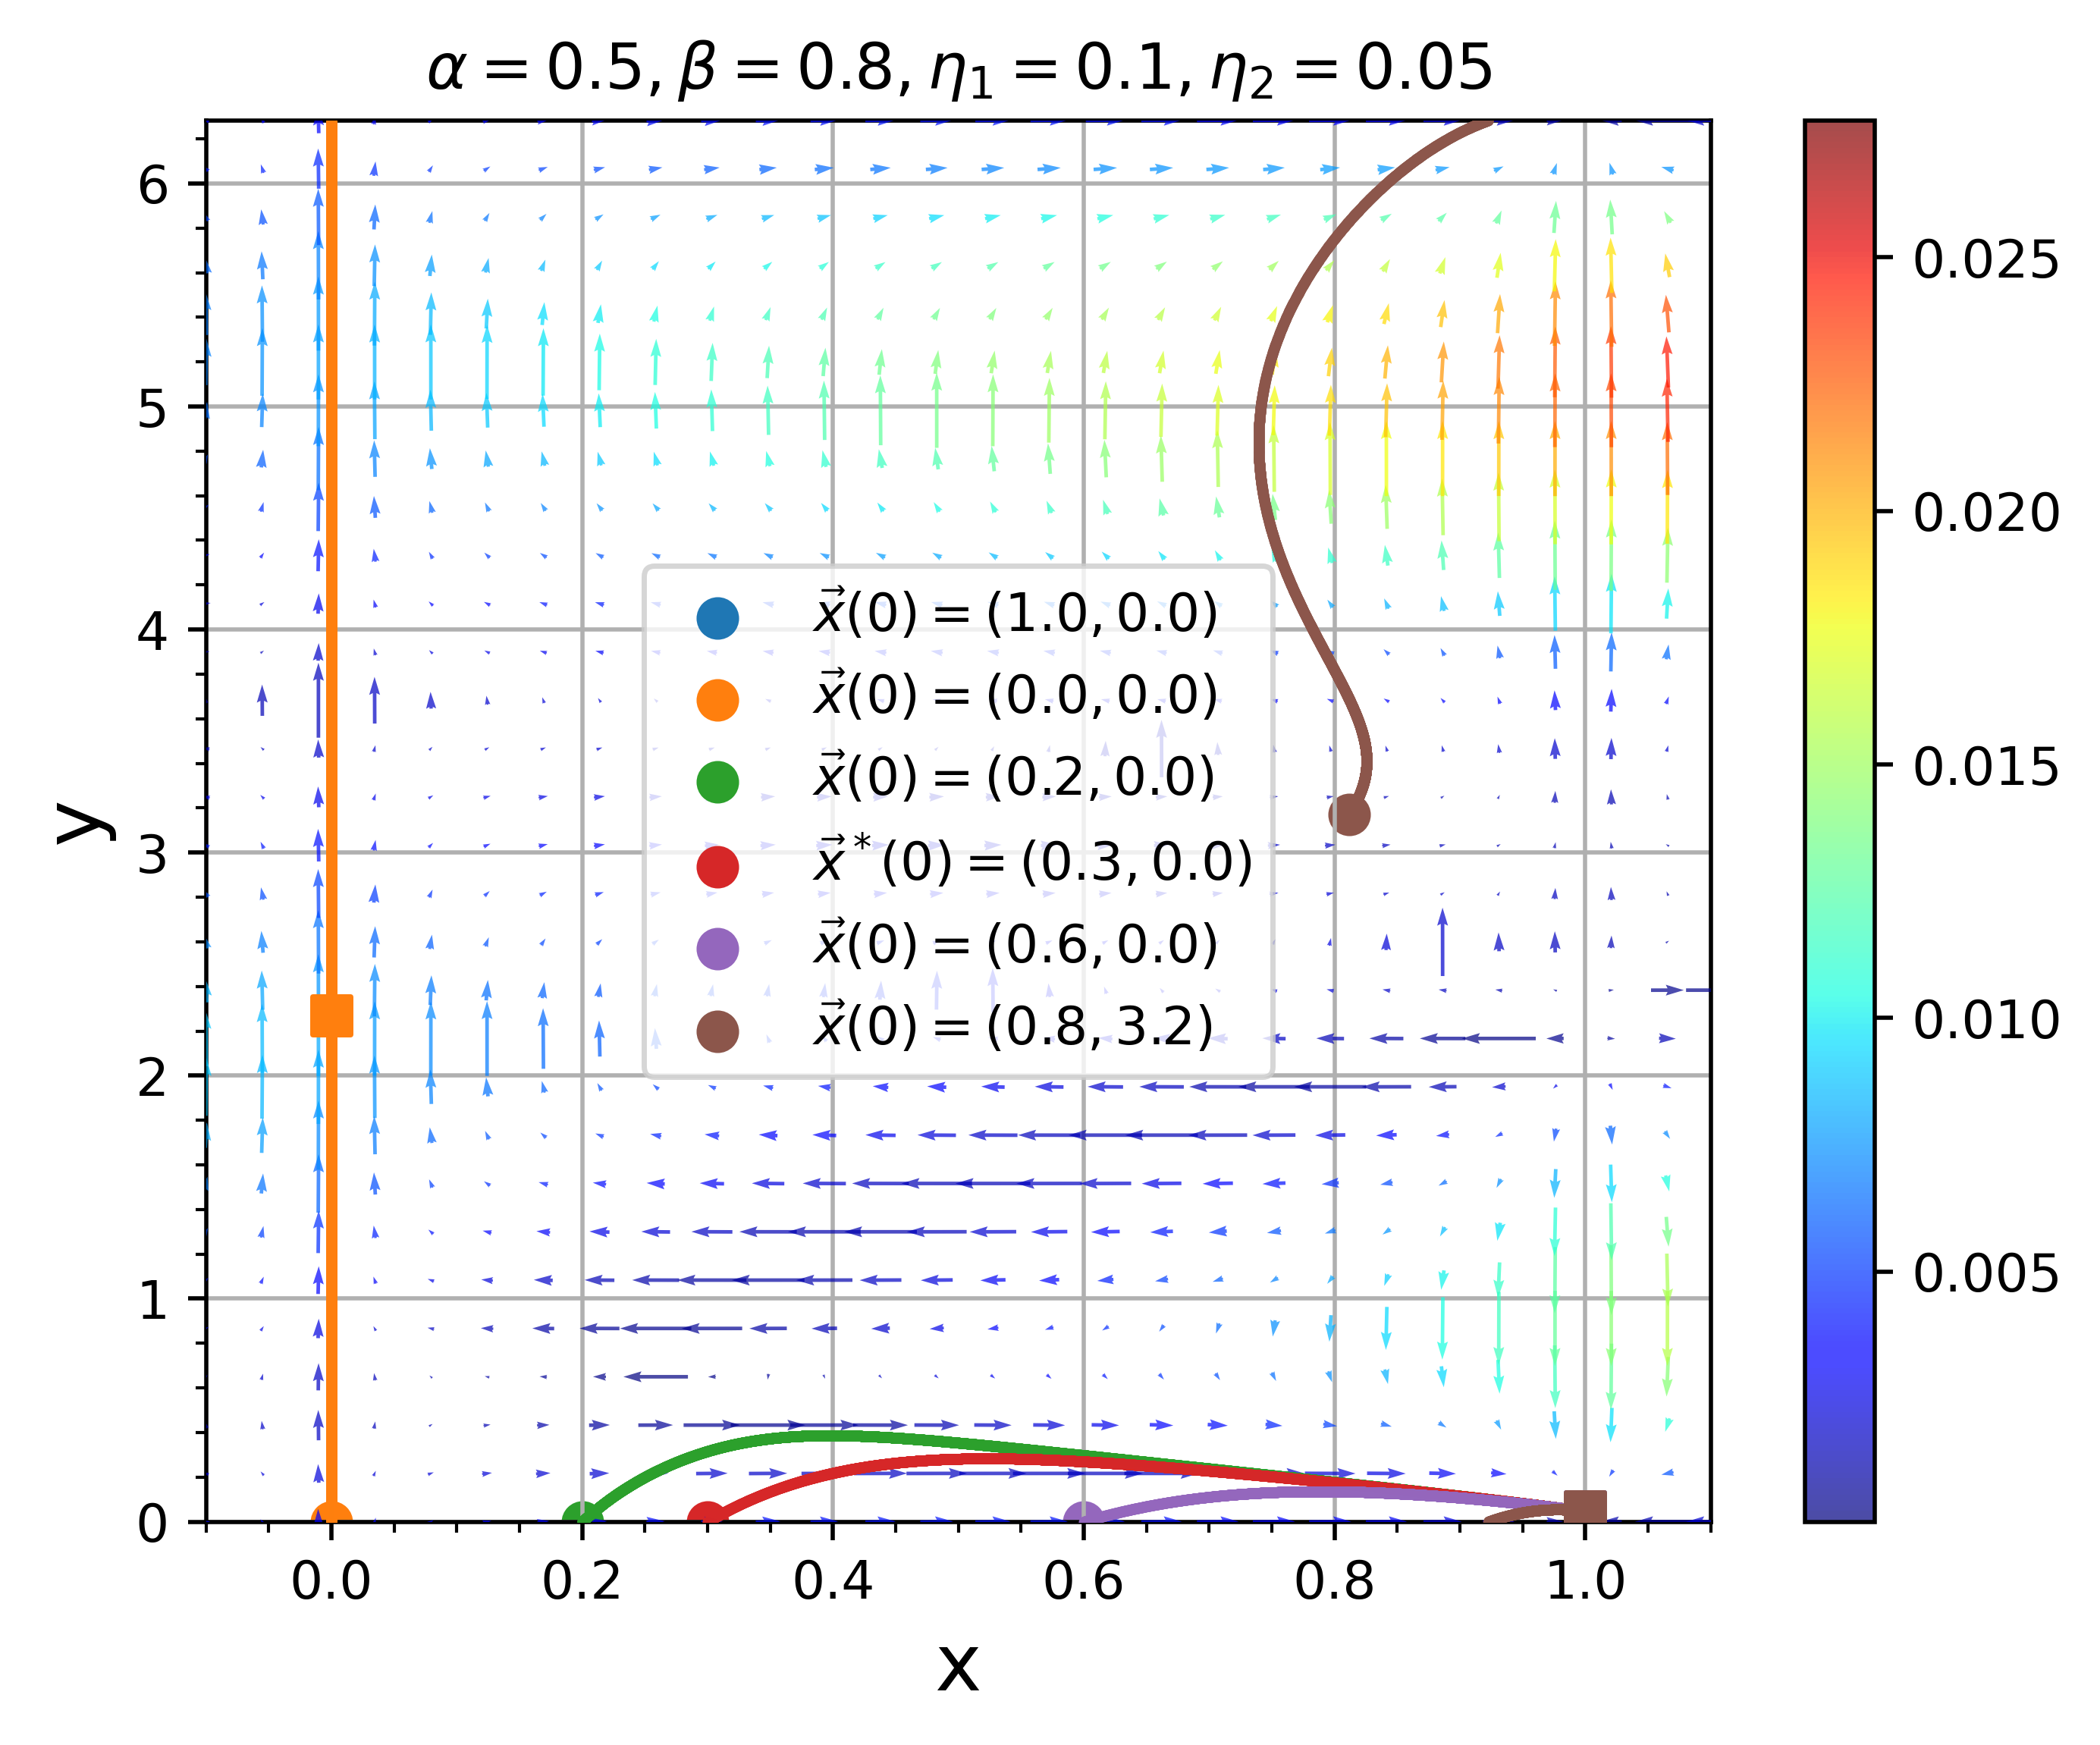

In [96]:
# beta = 0.7
# alpha = 1.2
# eta1 = 0.1
# eta2 = 0.05

alpha = 0.5
beta = 0.8
eta1 = 0.1
eta2 = 0.05

args = beta,alpha,eta1,eta2
t = np.arange(0,6000,0.1)
y = np.linspace(0,0,1)
x = np.linspace(0,2*np.pi,5)
X,Y = np.meshgrid(x,y)
fx = 0.5
fy = 0.5
# u0s = [[1-1e-3,0],[0 + 1e-3,1],[fx,fy]]
u0s = [[1,0],[0,0],[0.2,0],[0.3,0],[0.6, 0],[0.9114966199929684-0.1,3.072208206306462+0.1]]
# u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
plt.figure(dpi=500)
for i,u0 in enumerate(u0s):

	u = RK4(myFun,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	else:	
		c = plt.scatter(u[0,0],u[0,1]%(np.pi*2),s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	plt.scatter(u[-1,0],u[-1,1]%(np.pi*2),s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.scatter(u[:,0],u[:,1]%(np.pi*2),s=1,alpha=0.8,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

plt.legend()
x = np.linspace(-0.1,1.2,30)
y = np.linspace(0,2*np.pi,30)
X,Y = np.meshgrid(x,y)

U,V = myFun2([X,Y],0,args)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);

# V = 0*V
xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=20,pivot='mid',cmap='jet',zorder=3,alpha=0.7)
plt.colorbar()
plt.xlim(-0.1,1.1)
plt.ylim(0,2*np.pi)
# plt.legend()
ax =plt.gca()
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
# plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')



## 1. dr = 0인 해를 dphi = 0인 해에 넣어서 풀기

$dr=0$이 되는 해는  r = 0,-1,1,$\frac{\beta \eta_1 \left(-\cos{\left(\alpha+\phi\right)}\pm\left|\sin(\alpha)\right|\right)}{\eta_2\cos{\left(\alpha+2\phi\right)}}$

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from parfor import parfor
from tqdm.notebook import tqdm

In [246]:
def r0_p(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)+np.sin(phi)) / (eta2*np.cos(alpha))
    return r0

def r0_m(phi,alpha,beta,eta1,eta2):
    r0 = beta*eta1*(-np.cos(alpha+phi)-np.sin(phi)) / (eta2*np.cos(alpha))
    return r0

def r0_1(phi,alpha,beta,eta1,eta2):
    return np.ones_like(phi)
def r0_M1(phi,alpha,beta,eta1,eta2):
    return -np.ones_like(phi)
def r0_0(phi,alpha,beta,eta1,eta2):
    return np.zeros_like(phi)

def phi0(phi,alpha,beta,eta1,eta2,r):
    # eta1 delta peak의 분포 차
    r0 = r(phi,alpha,beta,eta1,eta2)
    dpsi2 = - 1/2 * (1+r0**2)*(eta2*r0*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha+phi)+beta**2*eta1**2*np.sin(alpha+2*phi))
    dpsi1 = - 1/2 * (2)*(eta1*np.sin(alpha)+2*beta*eta1*eta2*r0*np.sin(alpha-phi)+beta**2*eta2**2*r0**2*np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return dphi    

def F_Jm(r,phi,alpha,beta,eta1,eta2):
    # beta = eta2*r*(-np.cos(alpha+phi) - np.sin(phi))/ (eta1 * np.cos(alpha+2*phi))
    drdr = -r**2*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha)) + r*(1 - r**2)*(2*beta*eta1*eta2*np.cos(alpha + phi) + 2*eta2**2*r*np.cos(alpha))/2 + (1 - r**2)*(beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi) + eta2**2*r**2*np.cos(alpha))/2
    drdphi = r*(1 - r**2)*(-2*beta**2*eta1**2*np.sin(alpha + 2*phi) - 2*beta*eta1*eta2*r*np.sin(alpha + phi))/2
    dphidr = 2*beta**2*eta2**2*r*np.sin(alpha - 2*phi) + 2*beta*eta1*eta2*np.sin(alpha - phi) - r*(beta**2*eta1**2*np.sin(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.sin(alpha + phi) + eta2**2*r**2*np.sin(alpha)) + (-r**2/2 - 1/2)*(2*beta*eta1*eta2*np.sin(alpha + phi) + 2*eta2**2*r*np.sin(alpha))
    dphidphi = -2*beta**2*eta2**2*r**2*np.cos(alpha - 2*phi) - 2*beta*eta1*eta2*r*np.cos(alpha - phi) + (-r**2/2 - 1/2)*(2*beta**2*eta1**2*np.cos(alpha + 2*phi) + 2*beta*eta1*eta2*r*np.cos(alpha + phi))
    J = np.array([[drdr,drdphi],[dphidr,dphidphi]])
    D = np.linalg.det(J)
    tau = np.trace(J)
    discriminant = tau**2 - 4*D
    return np.linalg.det(J),np.trace(J),discriminant
def Linear_analysis(Det,Trace,Delta):
    D_sign = np.sign(Det)
    T_sign = np.sign(Trace)
    Delta_sign = np.sign(Delta)
    if Delta_sign == 1:
        C = 'node'
    elif Delta_sign == -1:
        C = 'spiral'
    else:
        C = 'Degenerate'
    if D_sign == -1:
        return 'Saddle'
    elif D_sign == 0:
        return 'Line/ need to analysis nonlinearity'
    
    if T_sign == 1:
        B = 'Stable'
    elif T_sign == -1:
        B = 'Unstable'
    else:
        return 'Center/ Need to analysis nonlinearity'
    return B + ' ' + C
    


In [349]:
phis = np.linspace(0,2*np.pi,10000)
alpha = 0.7
beta = 0.8
eta1 = 0.1
eta2 = 1e-3
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]


In [350]:
alphas = np.linspace(0,np.pi/2,50,endpoint=False)
betas = np.linspace(0,1,51)[1:]
AL,BE = np.meshgrid(alphas,betas)


In [351]:
RR,PPhi,TT = [],[],[]
for beta in tqdm(betas):
    @parfor(alphas,args=(beta,eta1,eta2,r0_m,*Range[0]),bar=False)
    def get_R_phi(alpha,beta,eta1,eta2,R0,Pi,Pf):
        # for R_i,R_f in Range:
        try:
            rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,R0),bracket=[Pi,Pf])
            R,phi = R0(rot.root,alpha,beta,eta1,eta2),rot.root
            J_S = F_Jm(R,phi,alpha,beta,eta1,eta2)
            LA = Linear_analysis(*J_S)

            # print(R,',',phi,Linear_analysis(*J_S))
            return R,phi,LA
        except ValueError:
            return np.nan,np.nan,np.nan
        
    R,Phi,Type = zip(*get_R_phi)
    RR.append(R)
    PPhi.append(Phi)
    TT.append(Type)


  0%|          | 0/50 [00:00<?, ?it/s]

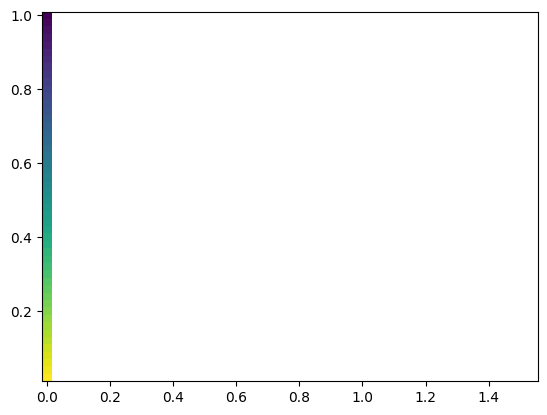

In [352]:
plt.pcolormesh(alphas,betas,np.array(RR))

In [353]:


def get_R_phis(alphas,betas,eta1,eta2,R0,Pi,Pf):
    RR,PPhi,TT = [],[],[]
    for beta in tqdm(betas):
        @parfor(alphas,args=(beta,eta1,eta2,R0,Pi,Pf),bar=False)
        def get_R_phi(alpha,beta,eta1,eta2,R0,Pi,Pf):
            # for R_i,R_f in Range:
            try:
                rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,R0),bracket=[Pi,Pf])
                R,phi = R0(rot.root,alpha,beta,eta1,eta2),rot.root
                J_S = F_Jm(R,phi,alpha,beta,eta1,eta2)
                LA = Linear_analysis(*J_S)

                # print(R,',',phi,Linear_analysis(*J_S))
                return R,phi,LA
            except ValueError:
                return np.nan,np.nan,np.nan
            
        R,Phi,Type = zip(*get_R_phi)
        RR.append(R)
        PPhi.append(Phi)
        TT.append(Type)
    RR,PPhi,TT  = map(np.array,[RR,PPhi,TT])
    return RR,PPhi,TT

In [354]:
RP = {}
PP = {}
TP = {}
for i in range(4):
    RP[i],PP[i],TP[i] = get_R_phis(alphas,betas,eta1,eta2,r0_p,*Range[i])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [355]:
RM = {}
PM = {}
TM = {}
for i in range(4):
    RM[i],PM[i],TM[i] = get_R_phis(alphas,betas,eta1,eta2,r0_m,*Range[i])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [356]:
R1 = {}
P1 = {}
T1 = {}
for i in range(4):
    R1[i],P1[i],T1[i] = get_R_phis(alphas,betas,eta1,eta2,r0_1,*Range[i])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [357]:
RM1 = {}
PM1 = {}
TM1 = {}
for i in range(4):
    RM1[i],PM1[i],TM1[i] = get_R_phis(alphas,betas,eta1,eta2,r0_M1,*Range[i])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [358]:
R0 = {}
P0 = {}
T0 = {}
for i in range(4):
    R0[i],P0[i],T0[i] = get_R_phis(alphas,betas,eta1,eta2,r0_0,*Range[i])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [359]:
np.where((TP[0]=='Stable node')|(TP[0]=='Stable spiral'),RM[i],np.nan)


array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-97.99919175,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3507590441.py:3: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(RR0,axis=0),origin='lower')


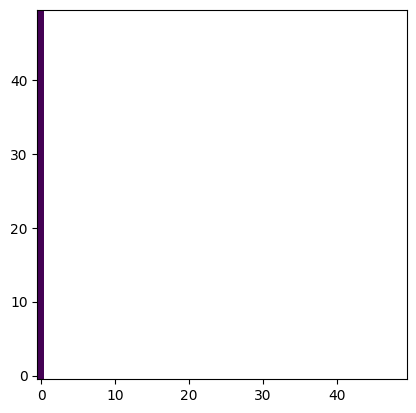

In [360]:
RR0 = np.array([RM1[i] for i in range(4)])

plt.imshow(np.nanmin(RR0,axis=0),origin='lower')

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/1297532237.py:3: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(RR0,axis=0),origin='lower')


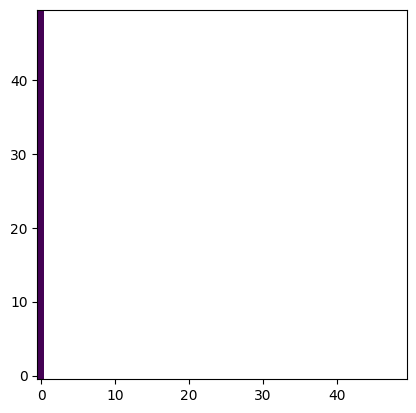

In [361]:
RR0 = np.array([R0[i] for i in range(4)])

plt.imshow(np.nanmin(RR0,axis=0),origin='lower')

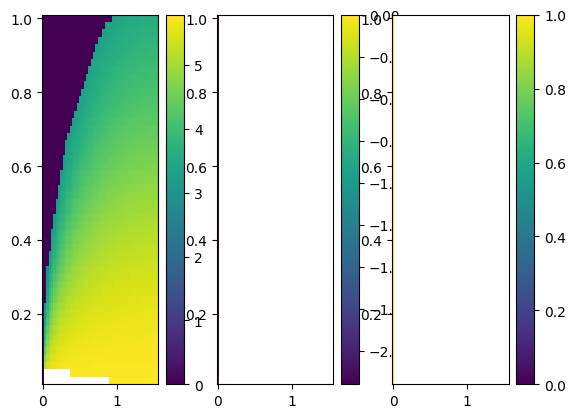

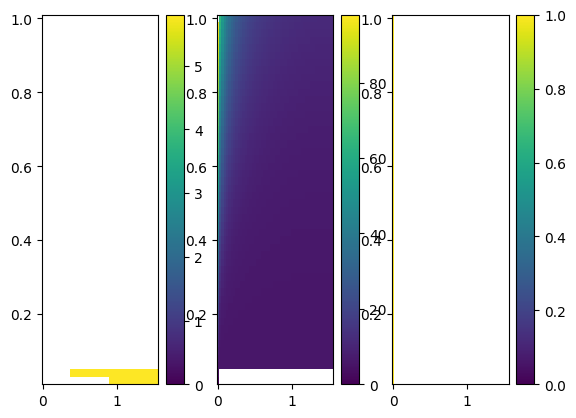

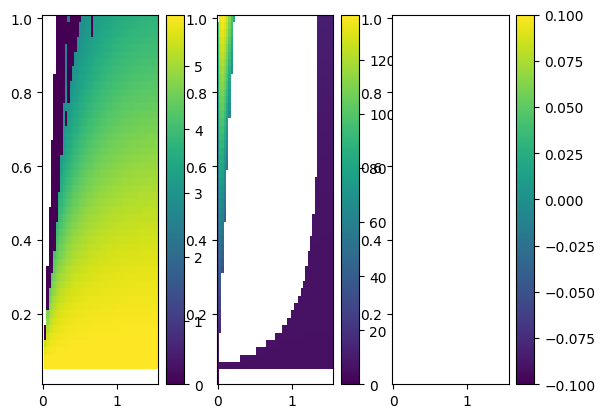

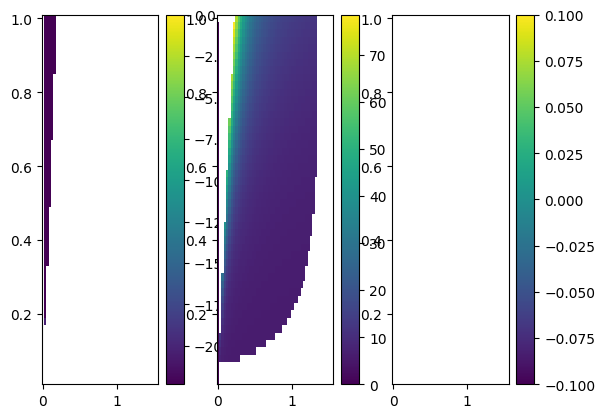

In [397]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure()
    plt.subplot(131)
    R_N = np.where((TP[i]=='Stable node')|(TP[i]=='Stable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,RP[i],vmin=0,)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(132)
    R_N = np.where((TM[i]=='Stable node')|(TM[i]=='Stable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,RM[i],vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(133)
    R_N = np.where((T1[i]=='Stable node')|(T1[i]=='Stable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R1[i],vmin=0,)
    plt.colorbar()

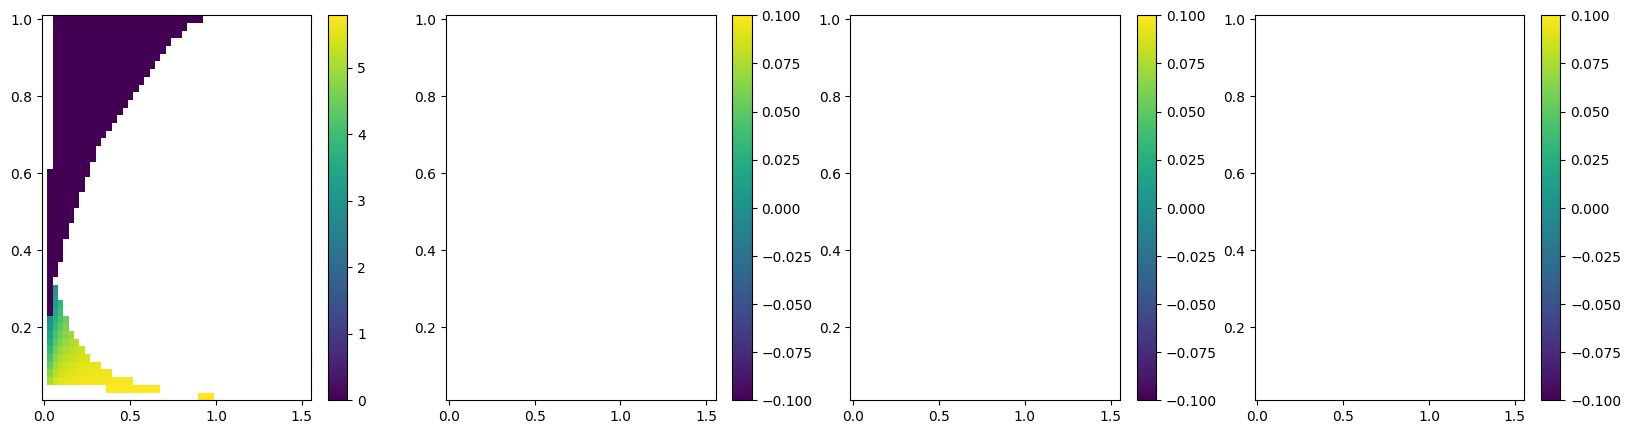

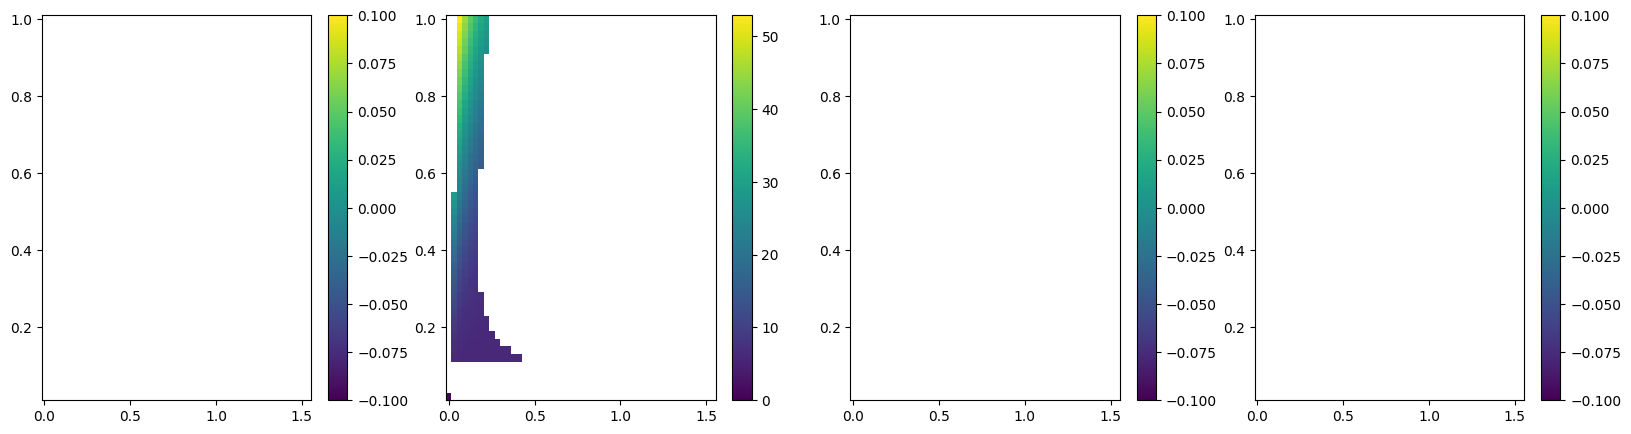

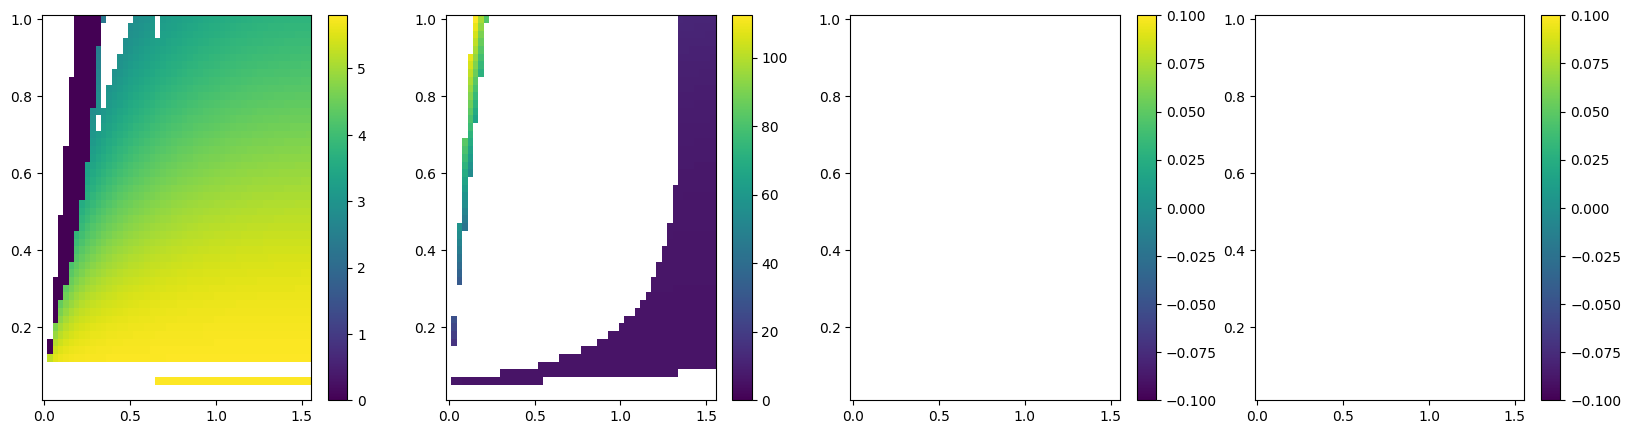

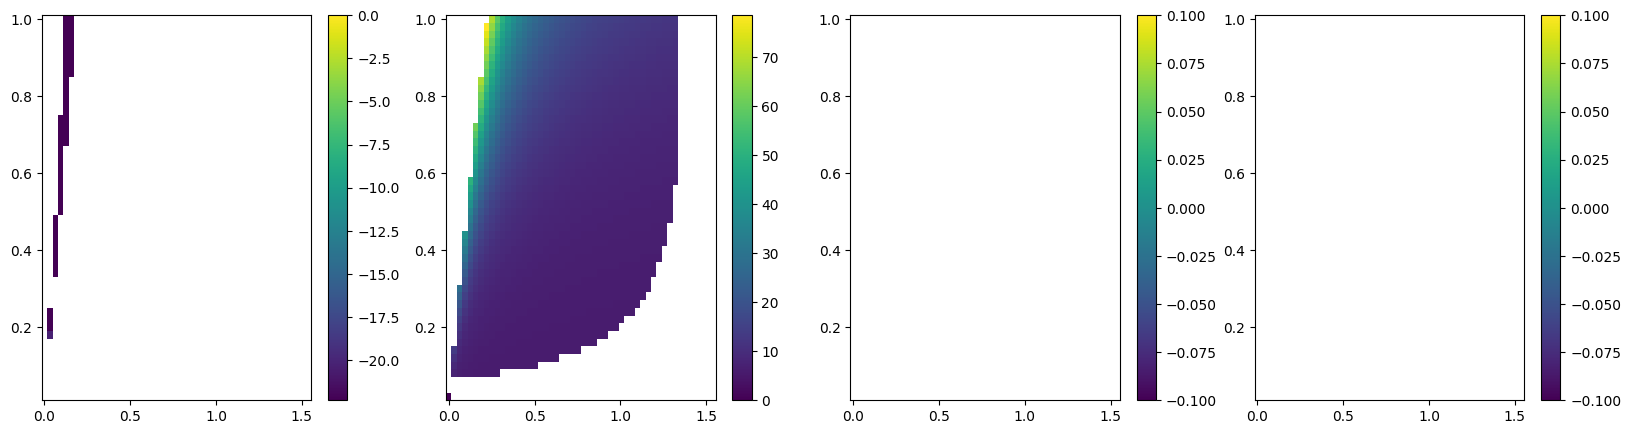

In [371]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    R_N = np.where((TP[i]=='Stable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(142)
    R_N = np.where((TM[i]=='Stable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(143)
    R_N = np.where((T1[i]=='Stable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    plt.subplot(144)
    R_N = np.where((T0[i]=='Stable spiral'),R0[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()

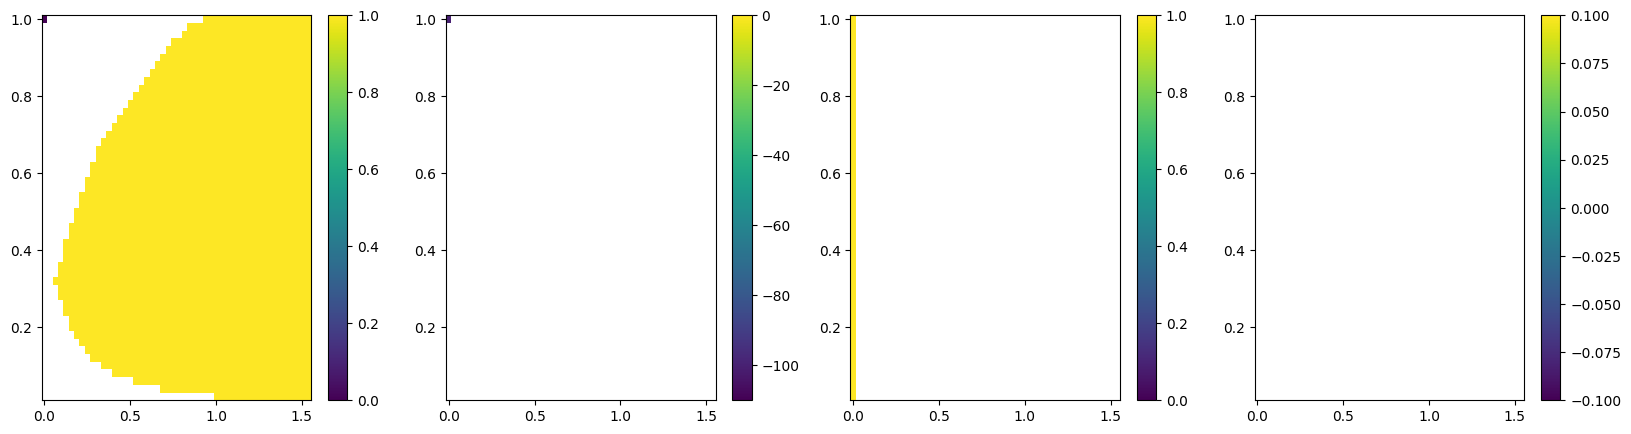

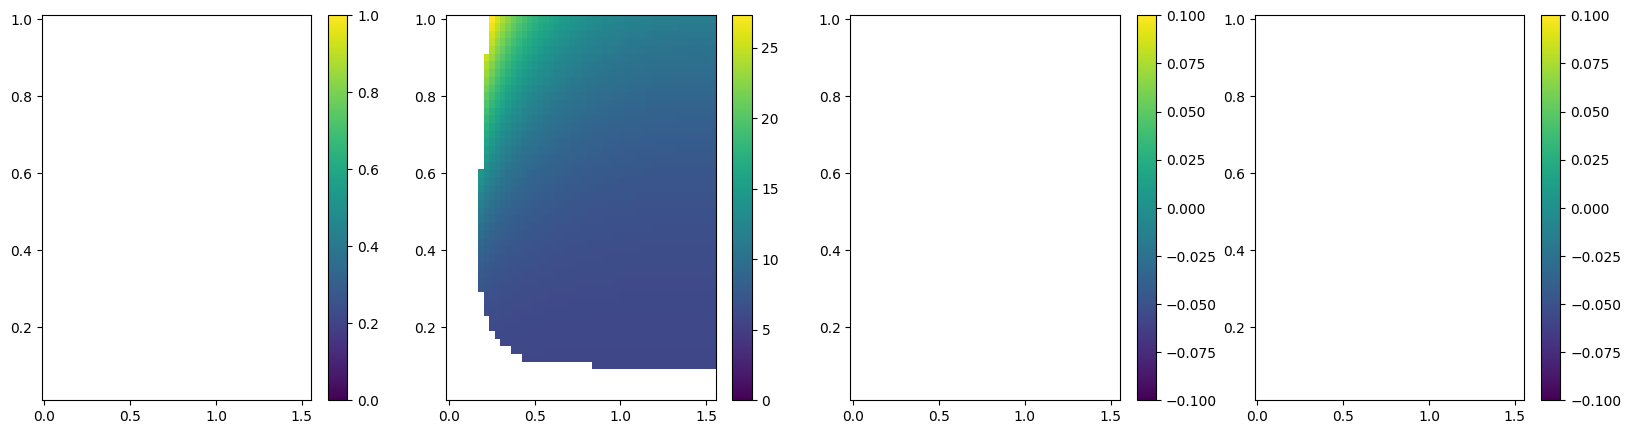

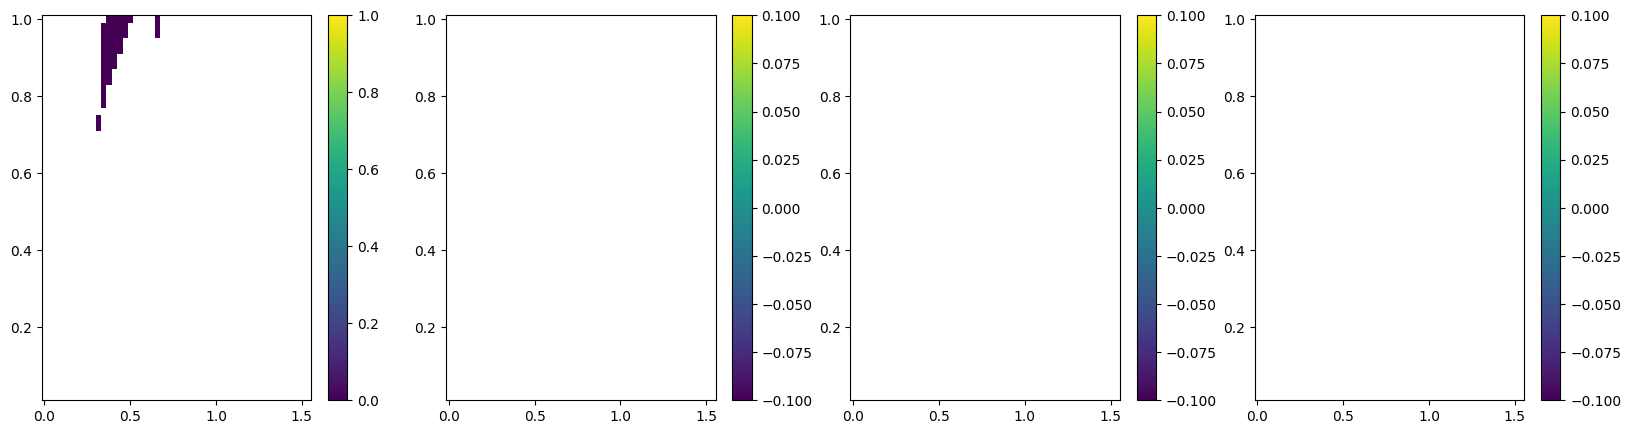

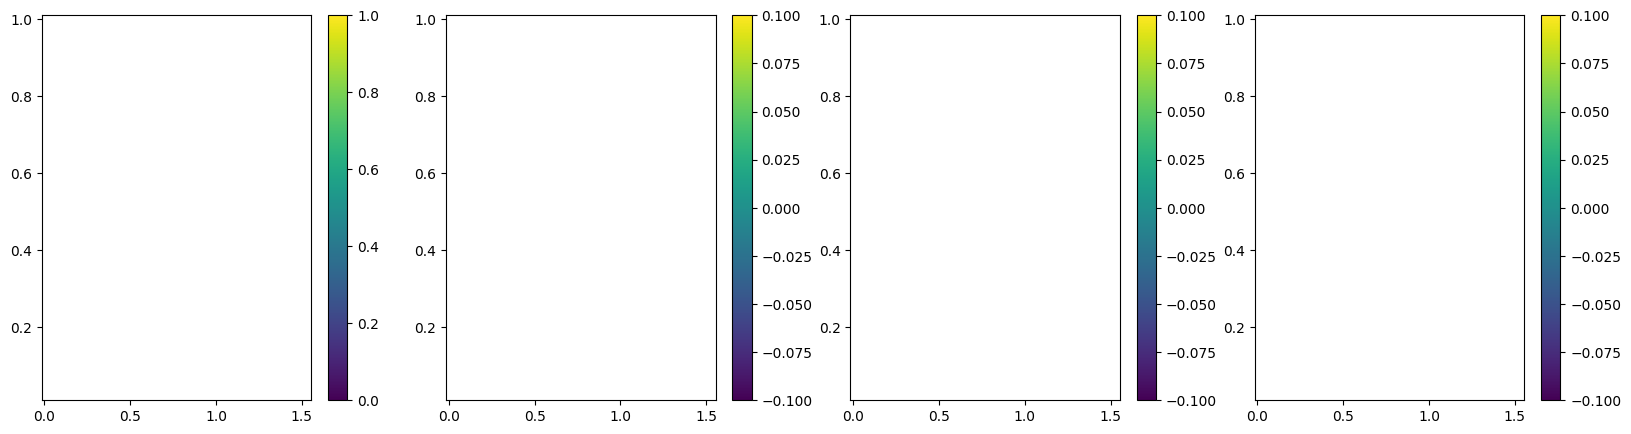

In [395]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    R_N = np.where((TP[i]=='Unstable node')|(TP[i]=='Unstable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,vmax=1)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(142)
    R_N = np.where((TM[i]=='Unstable node')|(TM[i]=='Unstable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(143)
    R_N = np.where((T1[i]=='Unstable node')|(T1[i]=='Unstable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    plt.subplot(144)
    R_N = np.where((T0[i]=='Unstable node')|(T0[i]=='Unstable spiral'),R0[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()

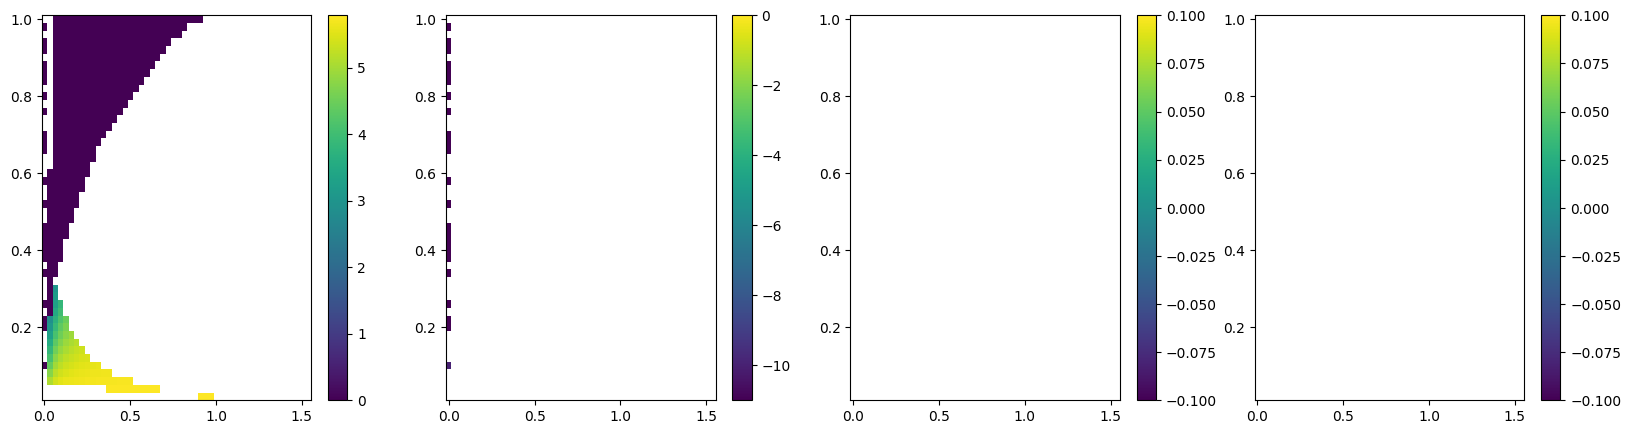

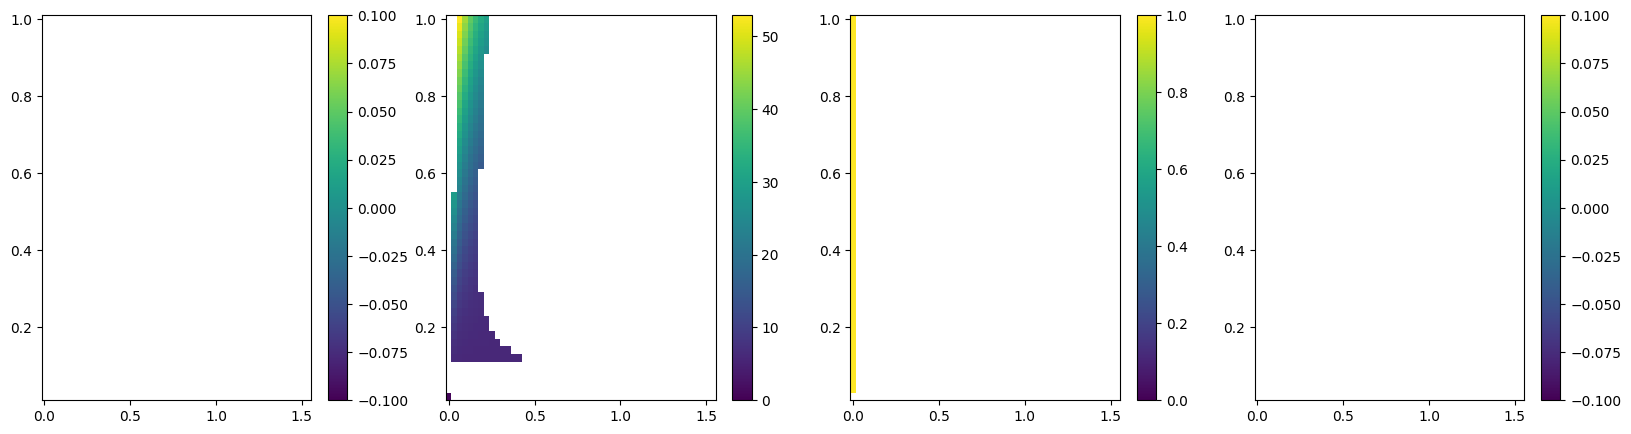

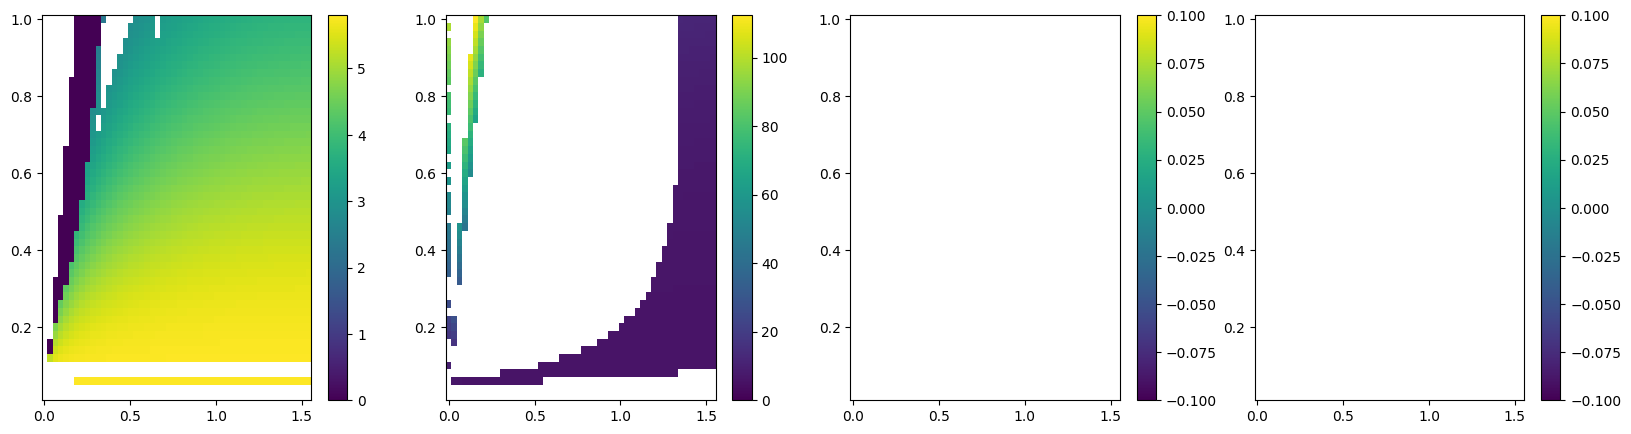

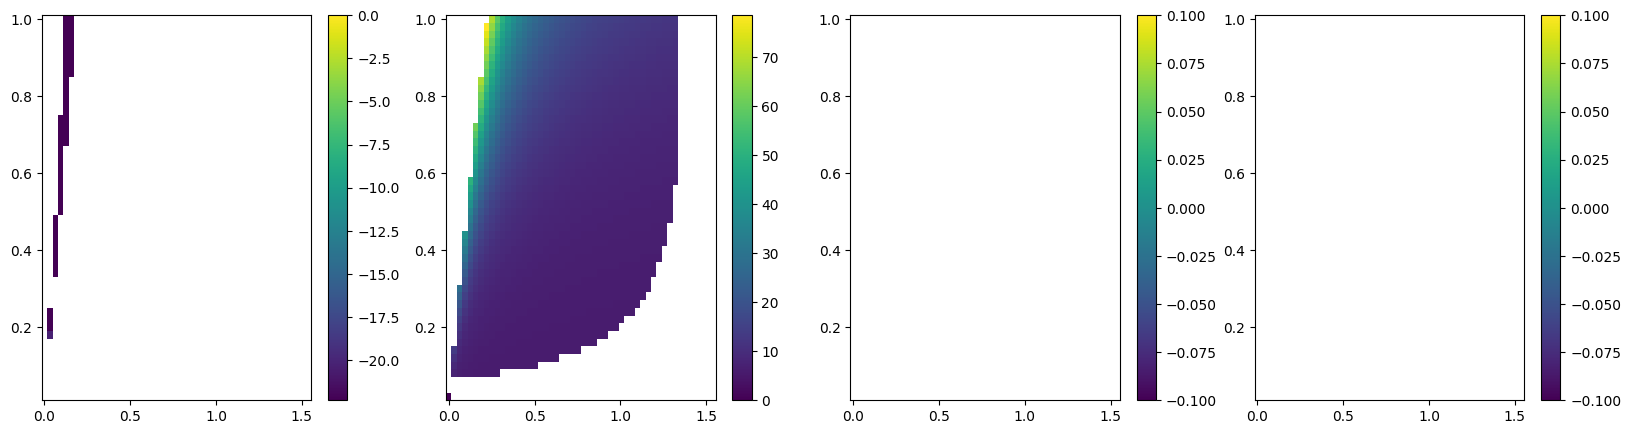

In [364]:
R_NP = []
R_NM = []
for i in range(4):
    plt.figure(figsize=(20,5))
    plt.subplot(141)
    R_N = np.where((TP[i]=='Stable node')|(TP[i]=='Stable spiral'),RP[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NP.append(R_N)
    plt.subplot(142)
    R_N = np.where((TM[i]=='Stable node')|(TM[i]=='Stable spiral'),RM[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    R_NM.append(R_N)

    plt.subplot(143)
    R_N = np.where((T1[i]=='Stable node')|(T1[i]=='Stable spiral'),R1[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()
    plt.subplot(144)
    R_N = np.where((T0[i]=='Stable node')|(T0[i]=='Stable spiral'),R0[i],np.nan)
    plt.pcolormesh(alphas,betas,R_N,vmin=0,)
    plt.colorbar()

In [372]:
R_SP = [np.where((TP[i]=='Saddle'),RP[i],np.nan) for i in range(4)]
R_SM = [np.where((TM[i]=='Saddle'),RM[i],np.nan) for i in range(4)]

In [391]:
R_NP = [np.where(((TP[i]=='Stable node')|(TP[i]=='Stable spiral'))&(np.abs(RP[i])<1),RP[i],np.nan) for i in range(4)]
R_NM = [np.where(((TM[i]=='Stable node')|(TM[i]=='Stable spiral'))&(np.abs(RM[i])<1),RM[i],np.nan) for i in range(4)]
R_N1 = [np.where(((T1[i]=='Stable node')|(T1[i]=='Stable spiral')),R1[i],np.nan) for i in range(4)]

In [382]:
R_UP = [np.where((TP[i]=='Unstable node')|(TP[i]=='Unstable spiral'),RP[i],np.nan) for i in range(4)]
R_UM = [np.where((TM[i]=='Unstable node')|(TM[i]=='Unstable spiral'),RM[i],np.nan) for i in range(4)]
R_U1 = [np.where((T1[i]=='Unstable node')|(T1[i]=='Unstable spiral'),R1[i],np.nan) for i in range(4)]

In [392]:
AN = np.nanmin(np.array(R_NP),axis=0)
BN = np.nanmin(np.array(R_NM),axis=0)
CN = np.nanmin(np.array(R_N1),axis=0)
NNN = np.nanmin([AN,BN,CN],axis=0)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3539644900.py:1: RuntimeWarning: All-NaN slice encountered
  AN = np.nanmin(np.array(R_NP),axis=0)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3539644900.py:2: RuntimeWarning: All-NaN slice encountered
  BN = np.nanmin(np.array(R_NM),axis=0)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3539644900.py:3: RuntimeWarning: All-NaN slice encountered
  CN = np.nanmin(np.array(R_N1),axis=0)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3539644900.py:4: RuntimeWarning: All-NaN axis encountered
  NNN = np.nanmin([AN,BN,CN],axis=0)


In [390]:
np.where()

-98.0

In [384]:
AU = np.nanmin(np.array(R_UP),axis=0)
BU = np.nanmin(np.array(R_UM),axis=0)
# CU = np.nanmin(np.array(R_U1),axis=0)
UUU = np.nanmin([AU,BU],axis=0)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/2202534004.py:1: RuntimeWarning: All-NaN slice encountered
  AU = np.nanmin(np.array(R_UP),axis=0)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/2202534004.py:2: RuntimeWarning: All-NaN slice encountered
  BU = np.nanmin(np.array(R_UM),axis=0)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/2202534004.py:4: RuntimeWarning: All-NaN axis encountered
  UUU = np.nanmin([AU,BU],axis=0)


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/1880974037.py:1: RuntimeWarning: All-NaN axis encountered
  AS,BS = np.nanmin(R_SP,axis=0),np.nanmin(R_SM,axis=0)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/1880974037.py:4: RuntimeWarning: All-NaN axis encountered
  plt.pcolormesh(alphas,betas,np.nanmin([AS,BS],axis=0),vmin = 0 ,vmax=1)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/1880974037.py:10: RuntimeWarning: All-NaN axis encountered
  AS,BS = np.nanmin(R_SP,axis=0),np.nanmin(R_SM,axis=0)


Text(0.5, 0.98, '$\\eta_1 = 0.1,\\eta_2 = 0.001$')

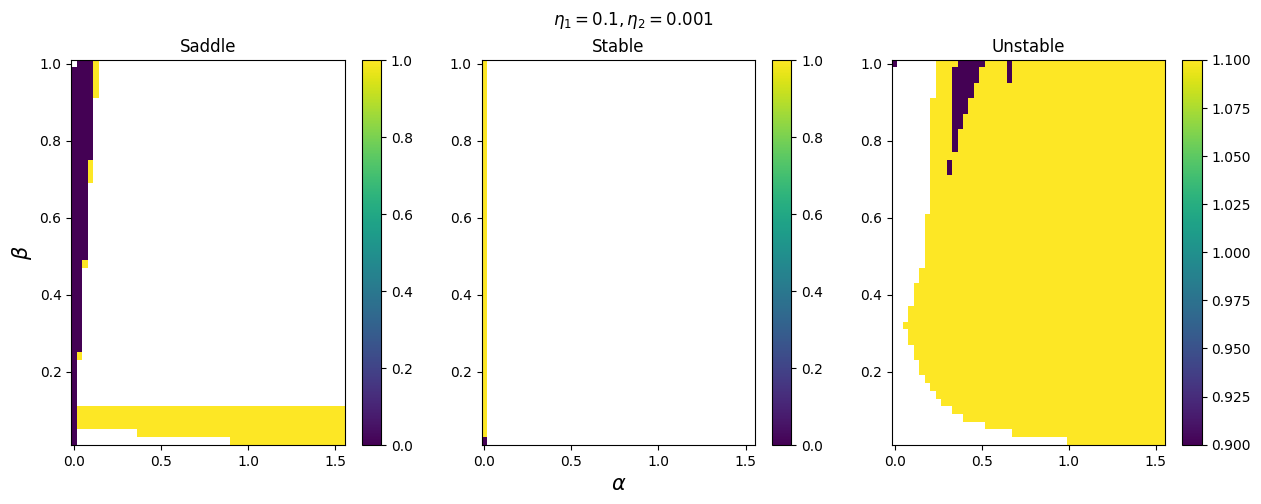

In [393]:
AS,BS = np.nanmin(R_SP,axis=0),np.nanmin(R_SM,axis=0)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pcolormesh(alphas,betas,np.nanmin([AS,BS],axis=0),vmin = 0 ,vmax=1)
plt.colorbar()
plt.ylabel(r'$\beta$',fontsize=15)
plt.title('Saddle')

plt.subplot(132)
AS,BS = np.nanmin(R_SP,axis=0),np.nanmin(R_SM,axis=0)
plt.pcolormesh(alphas,betas,NNN,vmin = 0 ,vmax=1)
plt.colorbar()
plt.title('Stable')
plt.xlabel(r'$\alpha$',fontsize=15)
plt.subplot(133)
plt.pcolormesh(alphas,betas,UUU,vmin = 1 ,vmax=1)
plt.colorbar()
plt.title('Unstable')

plt.suptitle(rf'$\eta_1 = {eta1},\eta_2 = {eta2}$')

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/2751193046.py:1: RuntimeWarning: All-NaN axis encountered
  plt.imshow(np.nanmin([A,B,C],axis=0),origin='lower')


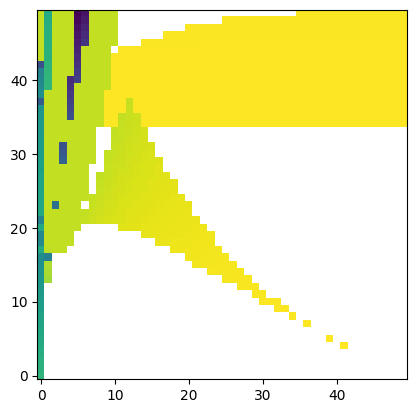

In [338]:
plt.imshow(np.nanmin([A,B,C],axis=0),origin='lower')

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3282692033.py:2: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(np.array(R_NP),axis=0),origin='lower',vmin=0,)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3282692033.py:5: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(np.array(R_NM),axis=0),origin='lower',vmin=0,)


Text(0.5, 1.0, 'Stable fixed point')

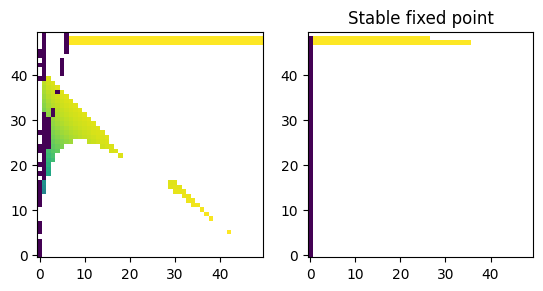

In [339]:
plt.subplot(121)
plt.imshow(np.nanmin(np.array(R_NP),axis=0),origin='lower',vmin=0,)

plt.subplot(122)
plt.imshow(np.nanmin(np.array(R_NM),axis=0),origin='lower',vmin=0,)
plt.title('Stable fixed point')

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/2056916983.py:2: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(np.array(R_UP),axis=0),origin='lower',vmin=0,vmax=1)
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/2056916983.py:4: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(np.array(R_UM),axis=0),origin='lower',vmin=0,vmax=1)


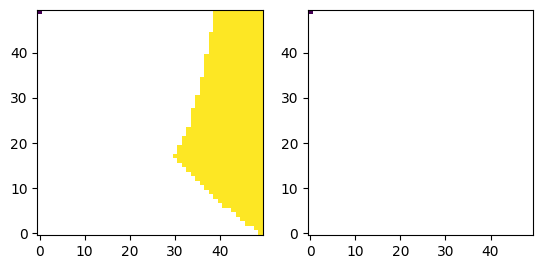

In [340]:
plt.subplot(121)
plt.imshow(np.nanmin(np.array(R_UP),axis=0),origin='lower',vmin=0,vmax=1)
plt.subplot(122)
plt.imshow(np.nanmin(np.array(R_UM),axis=0),origin='lower',vmin=0,vmax=1)


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/4181428091.py:1: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmin(np.array(R_NP),axis=0),origin='lower',vmin=0.8)


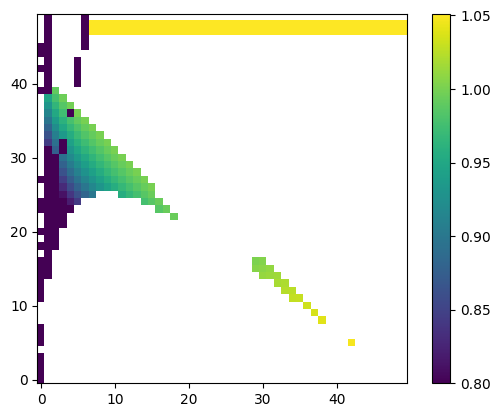

In [341]:
plt.imshow(np.nanmin(np.array(R_NP),axis=0),origin='lower',vmin=0.8)
plt.colorbar()

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/1333156232.py:1: RuntimeWarning: All-NaN slice encountered
  plt.imshow(np.nanmax(np.array(R_NM),axis=0))


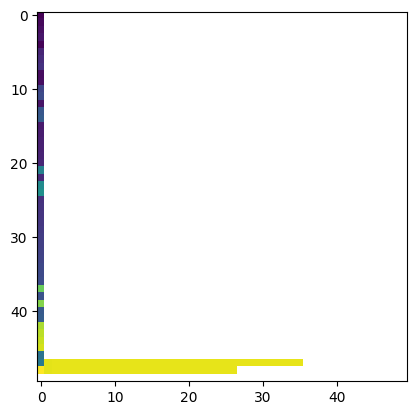

In [342]:
plt.imshow(np.nanmax(np.array(R_NM),axis=0))

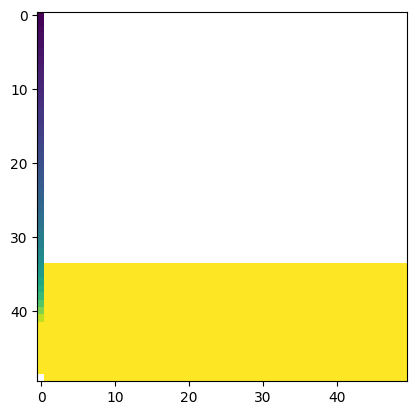

In [142]:
plt.imshow(RR1,vmax=1)

In [29]:
V_R_Phi(alpha,beta,eta1,eta2,r0_m,*Range[0])

(array(nan), array(nan), array(nan))

In [21]:
get_R_phi(alpha,beta,eta1,eta2,r0_m)

In [24]:
for i in F:
    print(i)

(nan, nan, nan)
(1.3685667872724907, 2.8937828217937573, (-1.111447116292429e-05, 0.004468050197162591, 6.442135721606182e-05))
(1.5048438578420242, 4.126505186740555, (0.000506913238969922, -0.0023956821080201446, -0.002021913663117))
(nan, nan, nan)


In [11]:
print('1')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_1),bracket=[R_i,R_f])
        J_S = F_Jm(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_1(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('0')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_0),bracket=[R_i,R_f])
        r0_0(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_0(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Plus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_p),bracket=[R_i,R_f])
        r0_p(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_p(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

print('Minus')
Range = [(0,np.pi/2),(np.pi/2,np.pi),(np.pi,3*np.pi/2),(3*np.pi/2,2*np.pi)]
for R_i,R_f in Range:
    try:
        rot = root_scalar(phi0,args=(alpha,beta,eta1,eta2,r0_m),bracket=[R_i,R_f])
        r0_m(rot.root,alpha,beta,eta1,eta2),rot.root
        J_S = F_Jm(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,alpha,eta1,eta2)
        print(r0_m(rot.root,alpha,beta,eta1,eta2),rot.root,Linear_analysis(*J_S))

    except ValueError:
        pass
        # print(R_i,R_f,'There is no solution') 

1
0
Plus
1.175426862926792 0.7504344087955623 Unstable spiral
1.371945891260315 3.2069486390626585 Stable node
Minus
1.3685667872724907 2.8937828217937573 Saddle
1.5048438578420242 4.126505186740555 Unstable spiral


In [219]:
PP = np.linspace(0,2*np.pi,1000)
def RRR(phi,alpha):
    n = np.sin(2*alpha+phi)
    d = np.sin(2*alpha-phi) + 2*np.sin(phi)
    A = n/d
    return np.sqrt(A)

In [223]:
np.nanmax(RRR(PP,1.5))

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_53605/3752521826.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(A)


4.433941576247028

## scipy

In [97]:
import sympy as sp

In [98]:
alpha,phi = sp.symbols("alpha phi")

In [99]:
AAA = sp.cos(alpha +  phi) **2  - sp.cos(alpha)* sp.cos(alpha+2*phi)

In [100]:
cos(alpha +  phi) **2  - cos(alpha)* cos(alpha+2*phi)

NameError: name 'cos' is not defined

In [101]:
AAA.simplify()

1/2 - cos(2*phi)/2

In [102]:
(sp.cos(alpha)* sp.cos(alpha+2*phi)).simplify()

cos(alpha)*cos(alpha + 2*phi)

In [405]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
Ap,Am= sp.symbols('A_+ A_-',real=True)
beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

# beta_rp = -eta2*r*(Ap)/(eta1*sp.cos(alpha + 2*phi))
# beta_rm = -eta2*r*(Am)/(eta1*sp.cos(alpha + 2*phi))


beta_rp = -eta2*r*(sp.cos(alpha + phi) + sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))
beta_rm = -eta2*r*(sp.cos(alpha + phi) - sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)

In [338]:
sp.print_latex(beta_rp)

- \frac{\eta_{2} r \left(\sin{\left(\phi \right)} + \cos{\left(\alpha + \phi \right)}\right)}{\eta_{1} \cos{\left(\alpha + 2 \phi \right)}}


In [389]:
dphi_r0 = sp.solve(dphi.subs(beta,beta_rm),r)

In [406]:
SIM = dphi.subs(beta,beta_rm).simplify()

In [407]:
n,_ = sp.fraction(SIM)

In [408]:
sp.print_latex(sp.collect((n*-2).expand(),r))

- 2 \eta_{1}^{4} \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} + r^{4} \left(\eta_{1}^{2} \eta_{2}^{2} \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} + \eta_{1}^{2} \eta_{2}^{2} \sin^{2}{\left(\phi \right)} \sin{\left(\alpha + 2 \phi \right)} + 2 \eta_{1}^{2} \eta_{2}^{2} \sin{\left(\phi \right)} \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} - 2 \eta_{1}^{2} \eta_{2}^{2} \sin{\left(\phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + \phi \right)} - 2 \eta_{1}^{2} \eta_{2}^{2} \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + \eta_{1}^{2} \eta_{2}^{2} \sin{\left(\alpha + 2 \phi \right)} \cos^{2}{\left(\alpha + \phi \right)} - 2 \eta_{2}^{4} \sin^{2}{\left(\phi \right)} \sin{\left(\alpha - 2 \phi \right)} + 4 \eta_{2}^{4} \sin{\left(\phi \right)} \sin{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + \phi \right)} - 2 \eta_{2}^{4} \sin{\left(\alpha -

In [409]:
sp.print_latex(sp.collect(n*-2,r))

- 2 \eta_{1}^{4} \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} - 2 \eta_{2}^{4} r^{4} \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right)^{2} \sin{\left(\alpha - 2 \phi \right)} + r^{2} \left(\eta_{1}^{2} \eta_{2}^{2} \left(r^{2} + 1\right) \left(\left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right)^{2} \sin{\left(\alpha + 2 \phi \right)} + 2 \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right) \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)}\right) - 4 \eta_{1}^{2} \eta_{2}^{2} \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right) \sin{\left(\alpha - \phi \right)} \cos{\left(\alpha + 2 \phi \right)}\right)


In [410]:
sp.print_latex(n*-2)#(1/eta1**2*1/eta2**2)

- 2 \eta_{1}^{4} \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} + \eta_{1}^{2} \eta_{2}^{2} r^{2} \left(r^{2} + 1\right) \left(\left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right)^{2} \sin{\left(\alpha + 2 \phi \right)} + 2 \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right) \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)}\right) - 4 \eta_{1}^{2} \eta_{2}^{2} r^{2} \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right) \sin{\left(\alpha - \phi \right)} \cos{\left(\alpha + 2 \phi \right)} - 2 \eta_{2}^{4} r^{4} \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right)^{2} \sin{\left(\alpha - 2 \phi \right)}


In [411]:
sol_phi0_r = sp.solve(n.simplify(),r)

In [412]:
sol_phi0_r

[-sqrt(-eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2/(2*eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2 + 2*eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi) + 4*eta1**2*eta2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 4*eta1**2*eta2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 4*eta1**2*eta2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 2*eta1**2*eta2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 4*eta2**3*sin(phi)**2*sin(alpha - 2*phi) + 8*eta2**3*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 4*eta2**3*sin(alpha - 2*phi)*cos(alpha + phi)**2) - eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi)/(2*eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2 + 2*eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi) + 4*eta1**2*eta2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 4*eta1**2*eta2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 4*eta1**2*eta2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 2*eta1**2*eta2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 4*eta2**3*sin(phi)**2*sin(alpha - 2*phi) + 8*eta2**3

In [413]:
sp.print_latex(n.simplify())

\eta_{1}^{4} \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} - \frac{\eta_{1}^{2} \eta_{2}^{2} r^{2} \left(r^{2} + 1\right) \left(\left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right)^{2} \sin{\left(\alpha + 2 \phi \right)} + 2 \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right) \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + \sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)}\right)}{2} + 2 \eta_{1}^{2} \eta_{2}^{2} r^{2} \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right) \sin{\left(\alpha - \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + \eta_{2}^{4} r^{4} \left(\sin{\left(\phi \right)} - \cos{\left(\alpha + \phi \right)}\right)^{2} \sin{\left(\alpha - 2 \phi \right)}


In [414]:
sp.solve(dphi.subs(beta,beta_rp),r)[0]

-sqrt(-eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2/(2*eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2 + 2*eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi) - 4*eta1**2*eta2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 4*eta1**2*eta2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 4*eta1**2*eta2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 2*eta1**2*eta2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 4*eta2**3*sin(phi)**2*sin(alpha - 2*phi) - 8*eta2**3*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 4*eta2**3*sin(alpha - 2*phi)*cos(alpha + phi)**2) - eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi)/(2*eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2 + 2*eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi) - 4*eta1**2*eta2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 4*eta1**2*eta2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 4*eta1**2*eta2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 2*eta1**2*eta2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 4*eta2**3*sin(phi)**2*sin(alpha - 2*phi) - 8*eta2**3*

In [415]:
dphi0_r2 = dphi_r0[2]#.simplify()
# dphi0_r1 = sp.solve(dphi.subs(beta,beta_rp),r)[1].simplify()

In [416]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)

F_PHIr0 = sp.lambdify((phi,(alpha,eta1,eta2)),sol_phi0_r[1])
F_PHIr1 = sp.lambdify((phi,(alpha,eta1,eta2)),sol_phi0_r[3])

In [351]:
# dphi0_r2.series(phi, x0=1, n=4)

KeyboardInterrupt: 

In [ ]:
dphi0_r1 = sp.solve(dphi.subs(beta,beta_rp),r)[0].simplify()

In [418]:
print(dphi0_r0)

NameError: name 'dphi0_r1' is not defined

In [409]:
print(sol_beta[0])

eta2*r*(-cos(alpha + phi) + Abs(sin(phi)))/(eta1*cos(alpha + 2*phi))


In [ ]:
alpha,phi,B = sp.symbols('alpha phi B',real = True)

In [429]:
# alpha,phi,B = np.symbols('alpha phi B',real = True)
eta1 = 0.1
eta2 = 0.05
alpha = 0.1
B = (eta1/eta2)**2
phi = np.linspace(0,3*np.pi,10000)

A1 = np.sin(alpha)*np.cos(alpha+2*phi)**2
AP = np.cos(alpha+phi) - np.sin(phi)
CP = AP**2 * np.sin(alpha + 2*phi) - 2*AP*np.sin(alpha+phi)*np.cos(alpha+2*phi) + A1
DP = CP - 2* AP**2 * np.sin(alpha-2*phi)/B
EP = CP + 4*AP*np.sin(alpha - phi) *np.cos(alpha + 2*phi)


In [430]:
R2 = (-EP - np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)
R1 = (-EP + np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)

/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_81183/2601235906.py:1: RuntimeWarning: invalid value encountered in sqrt
  R2 = (-EP - np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_81183/2601235906.py:2: RuntimeWarning: invalid value encountered in sqrt
  R1 = (-EP + np.sqrt(EP**2 + 8*DP*B*A1))/(2*DP)


/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_81183/872907847.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(phi,np.sqrt(R2))
/var/folders/z1/v9g3442s1hn29m34fht7zq8h0000gn/T/ipykernel_81183/872907847.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(phi,np.sqrt(R1))


Text(0.5, 1.0, '$\\alpha=0.1$')

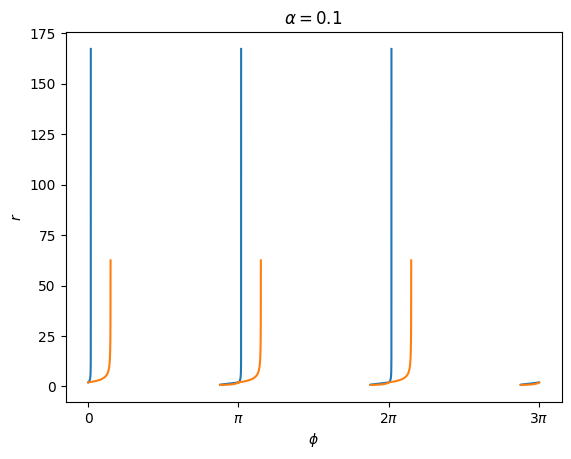

In [431]:
plt.plot(phi,np.sqrt(R2))
plt.plot(phi,np.sqrt(R1))
plt.xticks([0,np.pi,np.pi*2,np.pi*3],['0',r'$\pi$',r'$2\pi$',r'$3\pi$'])
plt.ylabel(r'$r$')
plt.xlabel(r'$\phi$')
plt.title(rf'$\alpha={alpha}$')

In [426]:
# F_PHIrp0 = F_PHIr0
# F_PHIrp1 = F_PHIr1

<lambdifygenerated-15>:3: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2/(2*eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2 + 2*eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi) - 4*eta1**2*eta2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 4*eta1**2*eta2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 4*eta1**2*eta2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 2*eta1**2*eta2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 4*eta2**3*sin(phi)**2*sin(alpha - 2*phi) - 8*eta2**3*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 4*eta2**3*sin(alpha - 2*phi)*cos(alpha + phi)**2) - eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi)/(2*eta1**2*eta2*sin(alpha)*cos(alpha + 2*phi)**2 + 2*eta1**2*eta2*sin(phi)**2*sin(alpha + 2*phi) - 4*eta1**2*eta2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 4*eta1**2*eta2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 4*eta1**2*eta2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 2*eta1**2*eta2*sin(alpha 

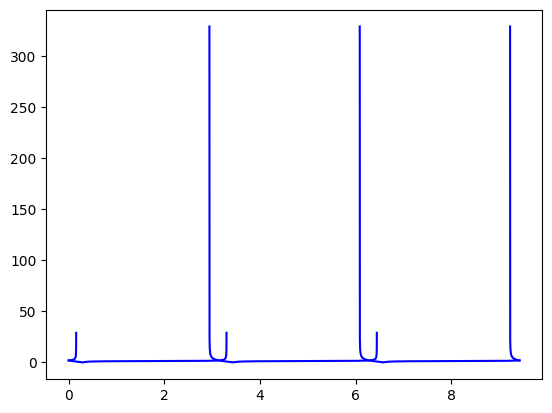

In [428]:
# plt.plot(phi,np.sqrt(R2))
# plt.plot(phi,np.sqrt(R1))

plt.plot(phi,F_PHIrp0(phi,(alpha,eta1,eta2)),color='blue')
plt.plot(phi,F_PHIrp1(phi,(alpha,eta1,eta2)),color='blue')
# 
plt.plot(phi,F_PHIr0(phi,(alpha,eta1,eta2)),color='red')
plt.plot(phi,F_PHIr1(phi,(alpha,eta1,eta2)),color='red')


In [270]:
alpha,phi,B = sp.symbols('alpha phi B',real = True)
# alpha = 0
# B = sp.inf
# phi = sp.linspace(0,2*sp.pi,1000)

A1 = sp.sin(alpha)*sp.cos(alpha+2*phi)**2
AP = sp.cos(alpha+phi) + sp.sin(phi)
CP = AP**2 * sp.sin(alpha + 2*phi) - 2*AP*sp.sin(alpha+phi)*sp.cos(alpha+2*phi) + A1
DP = CP - 2 * AP**2 * sp.sin(alpha-2*phi)/B
EP = CP + 4*AP*sp.sin(alpha - phi) *sp.cos(alpha + 2*phi)


In [272]:
DP.expand().trigsimp()

-(sin(alpha) + sin(3*alpha + 4*phi))/2 + sin(alpha)*cos(alpha + 2*phi)**2 + sin(phi)**2*sin(alpha + 2*phi) - 2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) + sin(alpha + 2*phi)*cos(alpha + phi)**2 - 2*sin(phi)**2*sin(alpha - 2*phi)/B - 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi)/B - 2*sin(alpha - 2*phi)*cos(alpha + phi)**2/B

In [ ]:
sp.lambdify((phi,(alpha,eta1,eta2)),sol_dphi0_r[1])

In [151]:
DP.simplify()

-B*(sin(phi) + cos(alpha + phi))**2*sin(alpha - 2*phi) + (sin(phi) + cos(alpha + phi))**2*sin(alpha + 2*phi) - 2*(sin(phi) + cos(alpha + phi))*sin(alpha + phi)*cos(alpha + 2*phi) + sin(alpha)*cos(alpha + 2*phi)**2

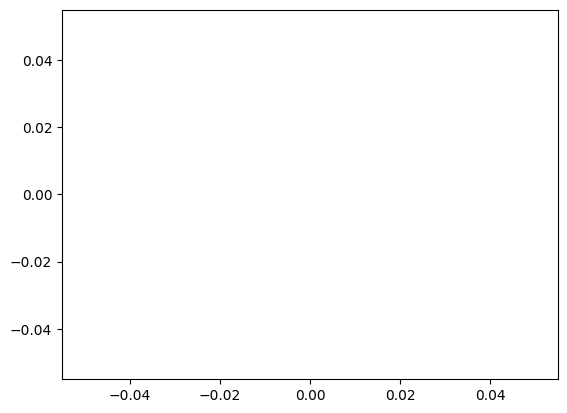

In [149]:
plt.plot(DP)

In [143]:
EP.expand().trigsimp().simplify()

sin(alpha)*cos(alpha + 2*phi)**2 - sin(alpha)/2 + sin(phi)**2*sin(alpha + 2*phi) + 4*sin(phi)*sin(alpha - phi)*cos(alpha + 2*phi) - 2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) + 4*sin(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi) + sin(alpha + 2*phi)*cos(alpha + phi)**2 - sin(3*alpha + 4*phi)/2

# Linear stability

In [440]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
Ap,Am= sp.symbols('A_+ A_-',real=True)
# beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
# beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

beta_rp = -eta2*r*(Ap)/(eta1*sp.cos(alpha + 2*phi))
beta_rm = -eta2*r*(Am)/(eta1*sp.cos(alpha + 2*phi))


# beta_rp = -eta2*r*(sp.cos(alpha + phi) + sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))
# beta_rm = -eta2*r*(sp.cos(alpha + phi) - sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))

dr = sp.Rational(1,2) * r* (1-r**2)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) * (1+r**2)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)


drdphi = sp.diff(dr,phi)
drdr   = sp.diff(dr,r)

dphidphi = sp.diff(dphi,phi)
dphidr   = sp.diff(dphi,r)
J = sp.Matrix([[drdr.subs(beta,beta_rp).simplify(),drdphi.subs(beta,beta_rp).simplify()],[dphidr.subs(beta,beta_rp).simplify(),dphidphi.subs(beta,beta_rp).simplify()]])

In [442]:
J_ = sp.Matrix([[drdr.simplify(),drdphi.simplify()],[dphidr.simplify(),dphidphi.simplify()]])


In [444]:
sp.print_latex(J_)

\left[\begin{matrix}- \frac{3 \beta^{2} \eta_{1}^{2} r^{2} \cos{\left(\alpha + 2 \phi \right)}}{2} + \frac{\beta^{2} \eta_{1}^{2} \cos{\left(\alpha + 2 \phi \right)}}{2} - 4 \beta \eta_{1} \eta_{2} r^{3} \cos{\left(\alpha + \phi \right)} + 2 \beta \eta_{1} \eta_{2} r \cos{\left(\alpha + \phi \right)} - \frac{5 \eta_{2}^{2} r^{4} \cos{\left(\alpha \right)}}{2} + \frac{3 \eta_{2}^{2} r^{2} \cos{\left(\alpha \right)}}{2} & \beta \eta_{1} r \left(r^{2} - 1\right) \left(\beta \eta_{1} \sin{\left(\alpha + 2 \phi \right)} + \eta_{2} r \sin{\left(\alpha + \phi \right)}\right)\\2 \beta^{2} \eta_{2}^{2} r \sin{\left(\alpha - 2 \phi \right)} + 2 \beta \eta_{1} \eta_{2} \sin{\left(\alpha - \phi \right)} - \eta_{2} \left(r^{2} + 1\right) \left(\beta \eta_{1} \sin{\left(\alpha + \phi \right)} + \eta_{2} r \sin{\left(\alpha \right)}\right) - r \left(\beta^{2} \eta_{1}^{2} \sin{\left(\alpha + 2 \phi \right)} + 2 \beta \eta_{1} \eta_{2} r \sin{\left(\alpha + \phi \right)} + \eta_{2}^{2} r^{2} \sin{\lef

In [439]:
sp.print_latex(J.det())

\frac{2 A_{+}^{4} \eta_{1}^{2} \eta_{2}^{4} r^{8} \sin^{2}{\left(\alpha + 2 \phi \right)} + 3 A_{+}^{4} \eta_{1}^{2} \eta_{2}^{4} r^{8} \cos^{2}{\left(\alpha + 2 \phi \right)} - 2 A_{+}^{4} \eta_{1}^{2} \eta_{2}^{4} r^{6} \sin^{2}{\left(\alpha + 2 \phi \right)} + 2 A_{+}^{4} \eta_{1}^{2} \eta_{2}^{4} r^{6} \cos^{2}{\left(\alpha + 2 \phi \right)} - A_{+}^{4} \eta_{1}^{2} \eta_{2}^{4} r^{4} \cos^{2}{\left(\alpha + 2 \phi \right)} - 4 A_{+}^{4} \eta_{2}^{6} r^{8} \sin{\left(\alpha - 2 \phi \right)} \sin{\left(\alpha + 2 \phi \right)} + 6 A_{+}^{4} \eta_{2}^{6} r^{8} \cos{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 4 A_{+}^{4} \eta_{2}^{6} r^{6} \sin{\left(\alpha - 2 \phi \right)} \sin{\left(\alpha + 2 \phi \right)} - 2 A_{+}^{4} \eta_{2}^{6} r^{6} \cos{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} - 8 A_{+}^{3} \eta_{1}^{2} \eta_{2}^{4} r^{8} \sin{\left(\alpha + \phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + 2 \phi \righ

In [1]:
import sympy as sp

$B_1 = \eta_1 /  \eta_2$ 
``` Group 1 : Delta peak  Group 2 : Gaussian distribution```

In [107]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
Apm,Ap,Am,A1,B1= sp.symbols('A_{\pm} A_+ A_- A_1 B_1',real=True)
 
# B1 = \eta_2 /  \eta_1

beta_rp = -r*(Ap)/(B1*sp.cos(alpha + 2*phi))
beta_rm = -r*(Am)/(B1*sp.cos(alpha + 2*phi))
beta_rpm = -r*(Apm)/(B1*sp.cos(alpha + 2*phi))


# beta_rp = -eta2*r*(sp.cos(alpha + phi) + sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))
# beta_rm = -eta2*r*(sp.cos(alpha + phi) - sp.sin(phi))/(eta1*sp.cos(alpha + 2*phi))

dr = (eta1*eta2)*sp.Rational(1,2) * r* (1-r**2)*(1/B1 * r**2 * sp.cos(alpha) + 2 * beta*r*sp.cos(alpha+phi) + beta **2 *B1 * sp.cos(alpha + 2*phi))
dpsi2 = -  (eta1*eta2)*sp.Rational(1,2) * (1+r**2)*(1/B1 * r**2 * sp.sin(alpha) + 2 * beta*r*sp.sin(alpha+phi) + beta**2 * B1 * sp.sin(alpha+2*phi))
dpsi1 = -  (eta1*eta2)*sp.Rational(1,2) * (2)*(B1 *sp.sin(alpha) + 2 * beta*r *sp.sin(alpha-phi) + beta**2 * 1/B1 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)


drdphi = sp.diff(dr,phi)
drdr   = sp.diff(dr,r)

dphidphi = sp.diff(dphi,phi)
dphidr   = sp.diff(dphi,r)
J = sp.Matrix([[drdr.subs(beta,beta_rpm).simplify(),drdphi.subs(beta,beta_rpm).simplify()],[dphidr.subs(beta,beta_rpm).simplify(),dphidphi.subs(beta,beta_rpm).simplify()]])

In [62]:
J.subs(sp.sin(alpha)*sp.cos(alpha+2*phi)**2,A1)

Matrix([
[                                                                                                                        eta1*eta2*r**2*(-3*A_{\pm}**2*r**2 + A_{\pm}**2 + 8*A_{\pm}*r**2*cos(alpha + phi) - 4*A_{\pm}*cos(alpha + phi) - 5*r**2*cos(alpha)*cos(alpha + 2*phi) + 3*cos(alpha)*cos(alpha + 2*phi))/(2*B_1*cos(alpha + 2*phi)),                                                                              A_{\pm}*eta1*eta2*r**3*(r**2 - 1)*(A_{\pm}*sin(alpha + 2*phi) - sin(alpha + phi)*cos(alpha + 2*phi))/(B_1*cos(alpha + 2*phi)**2)],
[eta1*eta2*r*(2*A_{\pm}*(A_{\pm}*r**2*sin(alpha - 2*phi) - B_1**2*sin(alpha - phi)*cos(alpha + 2*phi)) - B_1**2*r**2*(A_1 + A_{\pm}**2*sin(alpha + 2*phi) - 2*A_{\pm}*sin(alpha + phi)*cos(alpha + 2*phi)) + B_1**2*(r**2 + 1)*(A_{\pm}*sin(alpha + phi) - sin(alpha)*cos(alpha + 2*phi))*cos(alpha + 2*phi))/(B_1**3*cos(alpha + 2*phi)**2), A_{\pm}*eta1*eta2*r**2*(-2*A_{\pm}*r**2*cos(alpha - 2*phi) - B_1**2*(A_{\pm} - cos(alpha + phi))*(r**2 + 1)*cos(alp

In [108]:
J_det_sim = J.det()#.simplify()

In [84]:
(drdr.subs(beta,beta_rpm) * dphidphi.subs(beta,beta_rpm)).simplify()

A_{\pm}*eta1**2*eta2**2*r**4*(2*A_{\pm}*r**2*cos(alpha - 2*phi) + B_1**2*(A_{\pm} - cos(alpha + phi))*(r**2 + 1)*cos(alpha + 2*phi) - 2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi))*(3*A_{\pm}**2*r**2 - A_{\pm}**2 - 8*A_{\pm}*r**2*cos(alpha + phi) + 4*A_{\pm}*cos(alpha + phi) + 5*r**2*cos(2*phi)/2 + 5*r**2*cos(2*alpha + 2*phi)/2 - 3*cos(2*phi)/2 - 3*cos(2*alpha + 2*phi)/2)/(2*B_1**4*cos(alpha + 2*phi)**3)

In [136]:

J_com = 1/( 4 / (Apm*eta1**2*eta2**2*r**4) * (B1**4*sp.cos(alpha + 2*phi)**4))

JAC_ = (drdr.subs(beta,beta_rpm) * dphidphi.subs(beta,beta_rpm)).collect(r).simplify()
JAC = JAC_ / J_com


In [137]:
JBD_ = (drdphi.subs(beta,beta_rpm) * dphidr.subs(beta,beta_rpm)).collect(r).simplify()
JBD = JBD_ / J_com


In [143]:
J_com

A_{\pm}*eta1**2*eta2**2*r**4/(4*B_1**4*cos(alpha + 2*phi)**4)

In [195]:
J_DET0 = (JAC- JBD).expand().collect(r)

In [196]:
J_DET0_0C = J_DET0 - J_DET0.coeff(r**4) * r**4 - J_DET0.coeff(r**2) * r**2
J_DET0_4C = J_DET0.coeff(r**4)
J_DET0_2C = J_DET0.coeff(r**2)

In [197]:
J_DET0_4C.expand()

4*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 6*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 - 8*A_{\pm}**3*sin(alpha - 2*phi)*sin(alpha + 2*phi) + 12*A_{\pm}**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) - 16*A_{\pm}**2*B_1**2*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) - 22*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 8*A_{\pm}**2*sin(alpha - 2*phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 32*A_{\pm}**2*cos(alpha - 2*phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 8*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 + 12*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 + 4*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 + 3*A_{\pm}*B_1**2*cos(2*phi)*cos(alpha + 2*phi)**2 + 16*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi)**2 + 3*A_{\pm}*B_1**2*cos(alpha + 2*phi)**2*cos(2*alpha + 2*phi) + 8*A_{\pm}*cos(alpha)*cos(alpha - 2*phi)*cos(alpha + 2*phi)**2 + 6*A_{\pm}*cos(2*phi)*cos(alpha - 2*phi)*cos(alpha + 2*phi) + 6*A_{\pm}*cos(alpha - 2*phi)*cos(alpha

In [178]:
Adelta,Bdelta,Cdelta = sp.symbols('A_\Delta B_\Delta C_\Delta',real=True)

In [181]:
JJJ = J_DET0.subs([(J_DET0_2C,2*Bdelta),(J_DET0_4C,Adelta),(J_DET0_0C,Cdelta)])

In [198]:
J_DET0_2C/2

-2*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 2*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 + 4*A_{\pm}**3*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 2*A_{\pm}**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) + 4*A_{\pm}**2*B_1**2*sin(alpha - phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) + 6*A_{\pm}**2*B_1**2*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) - 6*A_{\pm}**2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 - 6*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}**2*sin(alpha - 2*phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 8*A_{\pm}**2*cos(alpha - 2*phi)*cos(alpha + phi)*cos(alpha + 2*phi) - 2*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 + 2*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 + 16*A_{\pm}*B_1**2*cos(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 4*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi

In [199]:
B_DD = J_DET0_2C/2

In [194]:
B_DD#.trigsimp()

-2*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 2*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 + 4*A_{\pm}**3*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 2*A_{\pm}**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) + 3*A_{\pm}**2*B_1**2*(cos(alpha + 3*phi) - cos(3*alpha + 5*phi))/2 + A_{\pm}**2*B_1**2*(cos(alpha + 5*phi) - cos(3*alpha + 3*phi)) - 6*A_{\pm}**2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 - 6*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}**2*sin(alpha - 2*phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 8*A_{\pm}**2*cos(alpha - 2*phi)*cos(alpha + phi)*cos(alpha + 2*phi) - 2*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 + 2*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 + 16*A_{\pm}*B_1**2*cos(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 4*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi)**2 - 3*A_{\pm}*cos(2

In [206]:
sp.print_latex(B_DD.collect([Apm,B1]))

A_{\pm}^{3} \left(- 2 B_{1}^{2} \sin^{2}{\left(\alpha + 2 \phi \right)} + 2 B_{1}^{2} \cos^{2}{\left(\alpha + 2 \phi \right)} + 4 \sin{\left(\alpha - 2 \phi \right)} \sin{\left(\alpha + 2 \phi \right)} - 2 \cos{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)}\right) + A_{\pm}^{2} \cdot \left(4 B_{1}^{2} \sin{\left(\alpha - \phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 6 B_{1}^{2} \sin{\left(\alpha + \phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} - 6 B_{1}^{2} \cos{\left(\alpha - \phi \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} - 6 B_{1}^{2} \cos{\left(\alpha + \phi \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} - 4 \sin{\left(\alpha - 2 \phi \right)} \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 8 \cos{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)}\right) + A_{\pm} \left(- 2 B_{1}^{2} \sin{\left(\alpha 

In [212]:
B_DD.collect([Apm,B1]).coeff(Apm**3).trigsimp()

-2*B_1**2*sin(alpha + 2*phi)**2 + 2*B_1**2*cos(alpha + 2*phi)**2 + 4*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 2*cos(alpha - 2*phi)*cos(alpha + 2*phi)

In [187]:
sp.solve(JJJ,r)[1]

sqrt(-B_\Delta/A_\Delta - sqrt(-A_\Delta*C_\Delta + B_\Delta**2)/A_\Delta)

In [167]:
J_DET0_2C/2

-2*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 2*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 + 4*A_{\pm}**3*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 2*A_{\pm}**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) + 4*A_{\pm}**2*B_1**2*sin(alpha - phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) + 6*A_{\pm}**2*B_1**2*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) - 6*A_{\pm}**2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 - 6*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}**2*sin(alpha - 2*phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 8*A_{\pm}**2*cos(alpha - 2*phi)*cos(alpha + phi)*cos(alpha + 2*phi) - 2*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 + 2*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 + 16*A_{\pm}*B_1**2*cos(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 4*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi

In [165]:
sp.print_latex(J_DET0_2C/2)

- 2 A_{\pm}^{3} B_{1}^{2} \sin^{2}{\left(\alpha + 2 \phi \right)} + 2 A_{\pm}^{3} B_{1}^{2} \cos^{2}{\left(\alpha + 2 \phi \right)} + 4 A_{\pm}^{3} \sin{\left(\alpha - 2 \phi \right)} \sin{\left(\alpha + 2 \phi \right)} - 2 A_{\pm}^{3} \cos{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 4 A_{\pm}^{2} B_{1}^{2} \sin{\left(\alpha - \phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 6 A_{\pm}^{2} B_{1}^{2} \sin{\left(\alpha + \phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + 2 \phi \right)} - 6 A_{\pm}^{2} B_{1}^{2} \cos{\left(\alpha - \phi \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} - 6 A_{\pm}^{2} B_{1}^{2} \cos{\left(\alpha + \phi \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} - 4 A_{\pm}^{2} \sin{\left(\alpha - 2 \phi \right)} \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + 8 A_{\pm}^{2} \cos{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + \phi \right)} \cos{\left(\alpha + 

In [164]:
J_DET0_0C

-A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 - 4*A_{\pm}**2*B_1**2*sin(alpha - phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) + 2*A_{\pm}**2*B_1**2*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) + 2*A_{\pm}**2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 + 5*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 2*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 + 4*A_{\pm}*B_1**2*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2 - 2*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 - 3*A_{\pm}*B_1**2*cos(2*phi)*cos(alpha + 2*phi)**2/2 - 8*A_{\pm}*B_1**2*cos(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi)**2 - 3*A_{\pm}*B_1**2*cos(alpha + 2*phi)**2*cos(2*alpha + 2*phi)/2 + 2*B_1**2*sin(alpha)*sin(alpha + phi)*cos(alpha + 2*phi)**3 + 3*B_1**2*cos(2*phi)*cos(alpha - phi)*cos(alpha + 2*phi)**2 + 3*B_1**2*cos(2*phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2/2 + 3*B_1**2*cos(alpha - phi)*cos(alpha

In [159]:
J_DET0_4C.trigsimp()

KeyboardInterrupt: 

In [ ]:
(Apm*eta1**2*eta2**2*r**4) * (B1**4*sp.cos(alpha + 2*phi)**4)

In [120]:
J_com = 1/( 1 / (Apm*eta1**2*eta2**2*r**4) * (B1**4*sp.cos(alpha + 2*phi)**4))

A_{\pm}*eta1**2*eta2**2*r**4/(B_1**4*cos(alpha + 2*phi)**4)

In [141]:
J_com

A_{\pm}*eta1**2*eta2**2*r**4/(4*B_1**4*cos(alpha + 2*phi)**4)

In [65]:
J_trace_sim = J.trace().simplify()

In [109]:
n_Jdet,_ = sp.fraction(J_det_sim)

In [111]:
J_det_sim

(2*A_{\pm}**4*B_1**2*eta1**2*eta2**2*r**8*sin(alpha + 2*phi)**2 + 3*A_{\pm}**4*B_1**2*eta1**2*eta2**2*r**8*cos(alpha + 2*phi)**2 - 2*A_{\pm}**4*B_1**2*eta1**2*eta2**2*r**6*sin(alpha + 2*phi)**2 + 2*A_{\pm}**4*B_1**2*eta1**2*eta2**2*r**6*cos(alpha + 2*phi)**2 - A_{\pm}**4*B_1**2*eta1**2*eta2**2*r**4*cos(alpha + 2*phi)**2 - 4*A_{\pm}**4*eta1**2*eta2**2*r**8*sin(alpha - 2*phi)*sin(alpha + 2*phi) + 6*A_{\pm}**4*eta1**2*eta2**2*r**8*cos(alpha - 2*phi)*cos(alpha + 2*phi) + 4*A_{\pm}**4*eta1**2*eta2**2*r**6*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 2*A_{\pm}**4*eta1**2*eta2**2*r**6*cos(alpha - 2*phi)*cos(alpha + 2*phi) - 8*A_{\pm}**3*B_1**2*eta1**2*eta2**2*r**8*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) - 11*A_{\pm}**3*B_1**2*eta1**2*eta2**2*r**8*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 4*A_{\pm}**3*B_1**2*eta1**2*eta2**2*r**6*sin(alpha - phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) + 6*A_{\pm}**3*B_1**2*eta1**2*eta2**2*r**6*sin(alpha + phi)*sin(alpha + 2*phi)*cos(alpha + 2*phi) - 6*A

In [67]:
n_Jtrace,_ = sp.fraction(J_trace_sim)

In [100]:
sp.factor(SS.coeff(r**2).simplify())

-4*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 4*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 + 8*A_{\pm}**3*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 4*A_{\pm}**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) - 12*A_{\pm}**2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 - 12*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 3*A_{\pm}**2*B_1**2*cos(alpha + 3*phi) + 2*A_{\pm}**2*B_1**2*cos(alpha + 5*phi) - 2*A_{\pm}**2*B_1**2*cos(3*alpha + 3*phi) - 3*A_{\pm}**2*B_1**2*cos(3*alpha + 5*phi) - 8*A_{\pm}**2*sin(alpha - 2*phi)*sin(alpha + phi)*cos(alpha + 2*phi) + 16*A_{\pm}**2*cos(alpha - 2*phi)*cos(alpha + phi)*cos(alpha + 2*phi) - 4*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 - 8*A_{\pm}*B_1**2*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2 - 8*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 + 4*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 + 32*A_{\pm}*B_1**2*cos(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 8*A_{\pm}*B_1**2*cos(alpha + phi)**2*

In [68]:
SS = sp.factor_list(n_Jdet)[-1][-1][0]

In [104]:
SS.collect(r)

-2*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 + 4*A_{\pm}**2*B_1**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 + 10*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 + A_{\pm}**2*B_1**2*cos(alpha + 3*phi) - 2*A_{\pm}**2*B_1**2*cos(alpha + 5*phi) + 2*A_{\pm}**2*B_1**2*cos(3*alpha + 3*phi) - A_{\pm}**2*B_1**2*cos(3*alpha + 5*phi) - 4*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 + 8*A_{\pm}*B_1**2*sin(alpha - phi)*sin(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 - 6*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 - 16*A_{\pm}*B_1**2*cos(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 8*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi)**2 + 4*B_1**2*sin(alpha)*sin(alpha + phi)*cos(alpha + 2*phi)**3 + 12*B_1**2*cos(alpha)*cos(alpha - phi)*cos(alpha + 2*phi)**3 + 6*B_1**2*cos(alpha)*cos(alpha + phi)*cos(alpha + 2*phi)**3 + r**4*(4*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 6*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)

In [105]:
A_Det = SS.coeff(r**4)#.collect(r)

In [106]:
A_Det

4*A_{\pm}**3*B_1**2*sin(alpha + 2*phi)**2 + 6*A_{\pm}**3*B_1**2*cos(alpha + 2*phi)**2 - 8*A_{\pm}**3*sin(alpha - 2*phi)*sin(alpha + 2*phi) + 12*A_{\pm}**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) - 22*A_{\pm}**2*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 - 4*A_{\pm}**2*B_1**2*cos(alpha + 3*phi) + 4*A_{\pm}**2*B_1**2*cos(3*alpha + 5*phi) + 8*A_{\pm}**2*sin(alpha - 2*phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 32*A_{\pm}**2*cos(alpha - 2*phi)*cos(alpha + phi)*cos(alpha + 2*phi) + 8*A_{\pm}*B_1**2*sin(alpha)*sin(alpha + 2*phi)*cos(alpha + 2*phi)**2 + 12*A_{\pm}*B_1**2*sin(alpha + phi)**2*cos(alpha + 2*phi)**2 + 10*A_{\pm}*B_1**2*cos(alpha)*cos(alpha + 2*phi)**3 + 16*A_{\pm}*B_1**2*cos(alpha + phi)**2*cos(alpha + 2*phi)**2 + 20*A_{\pm}*cos(alpha)*cos(alpha - 2*phi)*cos(alpha + 2*phi)**2 - 8*B_1**2*sin(alpha)*sin(alpha + phi)*cos(alpha + 2*phi)**3 - 10*B_1**2*cos(alpha)*cos(alpha + phi)*cos(alpha + 2*phi)**3

In [71]:
sp.solve(SS,r)

KeyboardInterrupt: 

In [70]:
sp.solve(n_Jtrace,r)[1].simplify()

B_1*sqrt((-A_{\pm}**2 + 4*A_{\pm}*cos(alpha - phi) - 2*A_{\pm}*cos(alpha + phi) + 3*cos(alpha)*cos(alpha + 2*phi))*cos(alpha + 2*phi)/(5*A_{\pm}**2*B_1**2*cos(alpha + 2*phi) + 4*A_{\pm}**2*cos(alpha - 2*phi) - 10*A_{\pm}*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi) + 5*B_1**2*cos(alpha)*cos(alpha + 2*phi)**2))

In [53]:
sp.solve(n_Jtrace,r)[2]

-B_1*sqrt(-(A_+**2 - 4*A_+*cos(alpha - phi) + 2*A_+*cos(alpha + phi) - 3*cos(alpha)*cos(alpha + 2*phi))*cos(alpha + 2*phi)/(5*A_+**2*B_1**2*cos(alpha + 2*phi) + 4*A_+**2*cos(alpha - 2*phi) - 10*A_+*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi) + 5*B_1**2*cos(alpha)*cos(alpha + 2*phi)**2))

In [39]:
sp.solve(n_Jtrace,r)[2].simplify()

-B_1*sqrt(-(A_+**2 - 4*A_+*cos(alpha - phi) + 2*A_+*cos(alpha + phi) - 3*cos(alpha)*cos(alpha + 2*phi))*cos(alpha + 2*phi)/(5*A_+**2*B_1**2*cos(alpha + 2*phi) + 4*A_+**2*cos(alpha - 2*phi) - 10*A_+*B_1**2*cos(alpha + phi)*cos(alpha + 2*phi) + 5*B_1**2*cos(alpha)*cos(alpha + 2*phi)**2))

In [43]:
n_Jdet

A_+*eta1**2*eta2**2*r**4*(2*A_+**3*B_1**2*r**4*sin(alpha + 2*phi)**2 + 3*A_+**3*B_1**2*r**4*cos(alpha + 2*phi)**2 - 2*A_+**3*B_1**2*r**2*sin(alpha + 2*phi)**2 + 2*A_+**3*B_1**2*r**2*cos(alpha + 2*phi)**2 - A_+**3*B_1**2*cos(alpha + 2*phi)**2 - 4*A_+**3*r**4*sin(alpha - 2*phi)*sin(alpha + 2*phi) + 6*A_+**3*r**4*cos(alpha - 2*phi)*cos(alpha + 2*phi) + 4*A_+**3*r**2*sin(alpha - 2*phi)*sin(alpha + 2*phi) - 2*A_+**3*r**2*cos(alpha - 2*phi)*cos(alpha + 2*phi) - 2*A_+**2*B_1**2*r**4*(cos(alpha + 3*phi) - cos(3*alpha + 5*phi)) - 11*A_+**2*B_1**2*r**4*cos(alpha + phi)*cos(alpha + 2*phi)**2 + 3*A_+**2*B_1**2*r**2*(cos(alpha + 3*phi) - cos(3*alpha + 5*phi))/2 + A_+**2*B_1**2*r**2*(cos(alpha + 5*phi) - cos(3*alpha + 3*phi)) - 6*A_+**2*B_1**2*r**2*cos(alpha - phi)*cos(alpha + 2*phi)**2 - 6*A_+**2*B_1**2*r**2*cos(alpha + phi)*cos(alpha + 2*phi)**2 + A_+**2*B_1**2*(cos(alpha + 3*phi) - cos(3*alpha + 5*phi))/2 - A_+**2*B_1**2*(cos(alpha + 5*phi) - cos(3*alpha + 3*phi)) + 2*A_+**2*B_1**2*cos(alpha - ph

In [44]:
PP = sp.poly(sp.factor_list(n_Jdet)[-1][-1][0],r)

In [52]:
PP.coeffs()[0].simplify()

KeyboardInterrupt: 